##### Se contempla la base de datos de CEM MIMP

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as ss
from scipy import stats
from scipy.stats import chi2_contingency

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc, roc_auc_score

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


# Establecer opciones para mostrar todas las filas y columnas
pd.set_option('display.max_rows', None)       # Para mostrar todas las filas
pd.set_option('display.max_columns', None)    # Para mostrar todas las columnas
pd.set_option('display.expand_frame_repr', False)  # Evitar el truncado en la visualización


In [2]:
data = pd.read_csv('datos_objetivo.csv')

C:\Users\steph\AppData\Local\Temp\ipykernel_3584\2216666051.py:1: DtypeWarning: Columns (175,190) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('datos_objetivo.csv')


In [3]:
data.shape

(94926, 214)

In [4]:
data.head(5)

,CEM,CONDICION,FECHA_INGRESO,INFORMANTE,FORMA_INGRESO,VICTIMA_PERUANA,VICTIMA_CUENTA_DNI,VICTIMA_EXTRANJERA,VICTIMA_PAIS_EXTRANJERO,VICTIMA_CARNE_EXTRANJERIA,VICTIMA_SOLICITANTE_REFUGIO,VICTIMA_REFUGIADO,VICTIMA_SOLICITANTE_ASILO,VICTIMA_ASILADO,VICTIMA_APATRIDA,VICTIMA_OTRA_SIT_MIGR,VICTIMA_NINGUNA_SIT_MIGR,EDAD_VICTIMA,SEXO_VICTIMA,VICTIMA_GESTANDO,HIJAS_VIVAS,HIJOS_VIVOS,LENGUA_MATERNA_VICTIMA,ETNIA_VICTIMA,DPTO_DOMICILIO,PROV_DOMICILIO,DIST_DOMICILIO,AREA_RESIDENCIA_DOMICILIO,ESTADO_CIVIL_VICTIMA,NIVEL_EDUCATIVO_VICTIMA,TRABAJA_VICTIMA,OCUPACION_VICTIMA,AGRESOR_PERUANO,AGRESOR_CUENTA_DNI,AGRESOR_EXTRANJERO,AGRESOR_PAIS_EXTRANJERO,AGRESOR_CARNE_EXTRANJERIA,AGRESOR_SOLICITANTE_REFUGIO,AGRESOR_REFUGIADO,AGRESOR_SOLICITANTE_ASILO,AGRESOR_ASILADO,AGRESOR_APATRIDA,AGRESOR_OTRA_SIT_MIGR,AGRESOR_NINGUNA_SIT_MIGR,VINCULO_AGRESOR_VICTIMA,VINCULO_PAREJA,VINCULO_FAMILIAR,SIN_VINCULO,AGRESOR_VIVE_CASA_VICTIMA,EDAD_AGRESOR,SEXO_AGRESOR,NIVEL_EDUCATIVO_AGRESOR,TRABAJA_AGRESOR,OCUPACION_AGRESOR,GRITOS_INSULTOS,VIOLENCIA_RACIAL,INDIFERENCIA,DISCR_ORIENTACION_SEXUAL,DISCR_GENERO,DISCR_IDENTIDAD_GENERO,RECHAZO,DESVALORIZACION_HUMILLACION,AMENAZA_QUITAR_HIJOS,OTRAS_AMENAZAS,PROHIBE_RECIBIR_VISITAS,PROHIBE_ESTUDIAR_TRABAJAR_SALIR,ROMPE_DESTRUYE_COSAS,VIGILANCIA_CONTINUA_PERSECUCION,BOTAR_CASA,AMENAZA_DE_MUERTE,ABANDONO,OTRA_VPSI,PUNTAPIES_PATADAS,PUÑETAZOS,BOFETADAS,JALONES_CABELLO,OTRAS_AGRESIONES,EMPUJONES,GOLPES_CON_PALOS,LATIGAZO,AHORCAMIENTO,HERIDAS_CON_ARMAS,GOLPES_CON_OBJETOS_CONTUNDENTES,NEGLIGENCIA,OTRA_VFIS,PERTURBACION_POSESION,MENOSCABO_TENENCIA_BIENES,PERDIDA_DERECHOS_PATRIMONIALES,LIMITACION_RECURSOS_ECONOMICOS,PRIVACION_MEDIOS_INDISPENSABLES,INCUMPLIMIENTO_OBLIGACION_ALIMENTARIA,CONTROL_DE_INGRESOS,PERCEPCION_SALARIO_MENOR,OTRA_VECON_PATRIM,ACOSO_SEXUAL,OFENSAS_AL_PUDOR,VIOLACION,ACTOS_CONTRA_EL_PUDOR,TRATA_CON_FINES_EXPLOTACION_SEXUAL,EXPLOTACION_SEXUAL,PORNOGRAFIA,OTRA_VSEX,DEPENDE_VICTIMA_FEMINICIDIO,PRIMERA_VEZ_AGREDE,N_AÑOS,N_MESES,N_SEMANAS,FRECUENCIA_AGREDE,TRATAMIENTO_PSICOLOGICO,TRATAMIENTO_PSIQUIATRICO,ATENCION_MEDICA,OTRO_TRATAMIENTO,NINGUN_TRATAMIENTO,CONTINUA_RECIBIENDO_TRATAMIENTO,FACTOR_AGRESOR_CONSUMO_ALCOHOL,FACTOR_AGRESOR_CONSUME_DROGA,FACTOR_VICTIMA_DISCAPACIDAD,FACTOR_VICTIMA_ABUSO_CONSUMO_ALCOHOL,FACTOR_VICTIMA_CONSUME_DROGAS,FACTOR_VICTIMA_POBLACION_LGTBI,VINCULO_AFECTIVO_FAMILIA,VINCULO_AFECTIVO_AMIGOS,VINCULO_AFECTIVO_VECINOS,VINCULO_AFECTIVO_ASOCIACIONES,VINCULO_AFECTIVO_ORGANIZACIONES_CIVICAS,VINCULO_AFECTIVO_COMPAÑEROS_TRABAJO,VINCULO_AFECTIVO_OTRO,VINCULO_AFECTIVO_NINGUNO,APOYO_EMOCIONAL,APOYO_COGNITIVO,APOYO_INSTRUMENTAL,APOYO_MATERIAL,NIVEL_DE_RIESGO_VICTIMA,INTERPUSO_DENUNCIA,DONDE_INTERPUSO_DENUNCIA,DESEA_DENUNCIAR,CUENTA_MEDIDAS_DE_PROTECCION,CUENTA_MEDIDAS_DE_CAUTELARES,DESEA_PATROCINIO_LEGAL,CASO_TENTATIVA_DE_FEMINICIDIO,LUGAR_TENTATIVA_DE_FEMINICIDIO,SITUACION_AGRESOR,TIPO_VIOLENCIA,CENTRO_POBLADO_DOMICILIO,ESTUDIA,LUGAR_ESTUDIA,TIPO_GESTION_ESTUDIA,SIS_SEGURO,ESSALUD_SEGURO,OTRO_SEGURO,NINGUN_SEGURO,HOSTIGAMIENTO_SEXUAL,ACOSO_SEX_ESP_PUB,ESTADO_AGRESOR_U_A,ESTADO_AGRESOR_G,ESTADO_VICTIMA_U_A,ESTADO_VICTIMA_G,REDES_FAM_SOC,FACTOR_VICTIMA_VIH,FACTOR_VICTIMA_CARCEL,OTRA_LENGUA_NATIVA_VICTIMA,PUEBLO_INDIGENA_AMAZONIA,PUEBLO_INDIGENA_ANDES,AGRESOR_DPTO_DOMICILIO,AGRESOR_PROV_DOMICILIO,AGRESOR_DIST_DOMICILIO,AGRESOR_CENTRO_POBLADO_DOMICILIO,AGRESOR_AREA_RESIDENCIA_DOMICILIO,VIOLENCIA_OBSTETRICA,ACOSO_POLITICO,VIOLENCIA_CONFLICTOS_SOCIALES,VIOLENCIA_CONFLICTO_ARMADO,VIOLENCIA_TICS,VIOLENCIA_CARCELARIA,NINGUNA_OTRA_MOD_VG,VULNERABILIDAD_VICTIMA_LGTBI,VULNERABILIDAD_VICTIMA_VIH,VULNERABILIDAD_VICTIMA_OTRO,VICTIMA_DISCAPACIDAD_FISICA,VICTIMA_DISCAPACIDAD_VISUAL,VICTIMA_DISCAPACIDAD_AUDITIVA,VICTIMA_DISCAPACIDAD_PSICOSOCIAL,VICTIMA_DISCAPACIDAD_INTELECTUAL,VICTIMA_DISCAPACIDAD_SORDOCIEGO,VICTIMA_DISCAPACIDAD_MUDO,COMP_DESTR_PROT,RECURSOS_INST,CUENTA_MEDIDAS_PROTECCION,CUENTA_MEDIDAS_CAUTELARES,MODALIDAD_TENTATIVA_DE_FEMINICIDIO,filter_$,ACUDE_SOLA,HIJAS_VIVAS_0_17,HIJOS_VIVAS_0_17,HIJAS_VIVAS_18_MAS,HIJ

In [6]:
data.info()
#print(data.notnull().sum())
print(data.dtypes)
#print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94926 entries, 0 to 94925
Columns: 214 entries, CEM to ANTECEDENTE_DESAPARICION
dtypes: float64(186), int64(24), object(4)
memory usage: 155.0+ MB
CEM                                         object
CONDICION                                    int64
FECHA_INGRESO                               object
INFORMANTE                                   int64
FORMA_INGRESO                                int64
VICTIMA_PERUANA                              int64
VICTIMA_CUENTA_DNI                         float64
VICTIMA_EXTRANJERA                           int64
VICTIMA_PAIS_EXTRANJERO                    float64
VICTIMA_CARNE_EXTRANJERIA                  float64
VICTIMA_SOLICITANTE_REFUGIO                float64
VICTIMA_REFUGIADO                          float64
VICTIMA_SOLICITANTE_ASILO                  float64
VICTIMA_ASILADO                            float64
VICTIMA_APATRIDA                           float64
VICTIMA_OTRA_SIT_MIGR                 

In [7]:
# Obtener y imprimir los nombres de las columnas de tipo 'object'
object_column_names = data.select_dtypes(include=['object']).columns
print(object_column_names)

Index(['CEM', 'FECHA_INGRESO', 'VULNERABILIDAD_VICTIMA_LGTBI', 'filter_$'], dtype='object')


In [8]:
data = data.drop('FECHA_INGRESO', axis=1)
data = data.drop('filter_$', axis=1)

In [9]:
data['CEM'] = LabelEncoder().fit_transform(data.CEM.values)

In [10]:
data.head(5)

,CEM,CONDICION,INFORMANTE,FORMA_INGRESO,VICTIMA_PERUANA,VICTIMA_CUENTA_DNI,VICTIMA_EXTRANJERA,VICTIMA_PAIS_EXTRANJERO,VICTIMA_CARNE_EXTRANJERIA,VICTIMA_SOLICITANTE_REFUGIO,VICTIMA_REFUGIADO,VICTIMA_SOLICITANTE_ASILO,VICTIMA_ASILADO,VICTIMA_APATRIDA,VICTIMA_OTRA_SIT_MIGR,VICTIMA_NINGUNA_SIT_MIGR,EDAD_VICTIMA,SEXO_VICTIMA,VICTIMA_GESTANDO,HIJAS_VIVAS,HIJOS_VIVOS,LENGUA_MATERNA_VICTIMA,ETNIA_VICTIMA,DPTO_DOMICILIO,PROV_DOMICILIO,DIST_DOMICILIO,AREA_RESIDENCIA_DOMICILIO,ESTADO_CIVIL_VICTIMA,NIVEL_EDUCATIVO_VICTIMA,TRABAJA_VICTIMA,OCUPACION_VICTIMA,AGRESOR_PERUANO,AGRESOR_CUENTA_DNI,AGRESOR_EXTRANJERO,AGRESOR_PAIS_EXTRANJERO,AGRESOR_CARNE_EXTRANJERIA,AGRESOR_SOLICITANTE_REFUGIO,AGRESOR_REFUGIADO,AGRESOR_SOLICITANTE_ASILO,AGRESOR_ASILADO,AGRESOR_APATRIDA,AGRESOR_OTRA_SIT_MIGR,AGRESOR_NINGUNA_SIT_MIGR,VINCULO_AGRESOR_VICTIMA,VINCULO_PAREJA,VINCULO_FAMILIAR,SIN_VINCULO,AGRESOR_VIVE_CASA_VICTIMA,EDAD_AGRESOR,SEXO_AGRESOR,NIVEL_EDUCATIVO_AGRESOR,TRABAJA_AGRESOR,OCUPACION_AGRESOR,GRITOS_INSULTOS,VIOLENCIA_RACIAL,INDIFERENCIA,DISCR_ORIENTACION_SEXUAL,DISCR_GENERO,DISCR_IDENTIDAD_GENERO,RECHAZO,DESVALORIZACION_HUMILLACION,AMENAZA_QUITAR_HIJOS,OTRAS_AMENAZAS,PROHIBE_RECIBIR_VISITAS,PROHIBE_ESTUDIAR_TRABAJAR_SALIR,ROMPE_DESTRUYE_COSAS,VIGILANCIA_CONTINUA_PERSECUCION,BOTAR_CASA,AMENAZA_DE_MUERTE,ABANDONO,OTRA_VPSI,PUNTAPIES_PATADAS,PUÑETAZOS,BOFETADAS,JALONES_CABELLO,OTRAS_AGRESIONES,EMPUJONES,GOLPES_CON_PALOS,LATIGAZO,AHORCAMIENTO,HERIDAS_CON_ARMAS,GOLPES_CON_OBJETOS_CONTUNDENTES,NEGLIGENCIA,OTRA_VFIS,PERTURBACION_POSESION,MENOSCABO_TENENCIA_BIENES,PERDIDA_DERECHOS_PATRIMONIALES,LIMITACION_RECURSOS_ECONOMICOS,PRIVACION_MEDIOS_INDISPENSABLES,INCUMPLIMIENTO_OBLIGACION_ALIMENTARIA,CONTROL_DE_INGRESOS,PERCEPCION_SALARIO_MENOR,OTRA_VECON_PATRIM,ACOSO_SEXUAL,OFENSAS_AL_PUDOR,VIOLACION,ACTOS_CONTRA_EL_PUDOR,TRATA_CON_FINES_EXPLOTACION_SEXUAL,EXPLOTACION_SEXUAL,PORNOGRAFIA,OTRA_VSEX,DEPENDE_VICTIMA_FEMINICIDIO,PRIMERA_VEZ_AGREDE,N_AÑOS,N_MESES,N_SEMANAS,FRECUENCIA_AGREDE,TRATAMIENTO_PSICOLOGICO,TRATAMIENTO_PSIQUIATRICO,ATENCION_MEDICA,OTRO_TRATAMIENTO,NINGUN_TRATAMIENTO,CONTINUA_RECIBIENDO_TRATAMIENTO,FACTOR_AGRESOR_CONSUMO_ALCOHOL,FACTOR_AGRESOR_CONSUME_DROGA,FACTOR_VICTIMA_DISCAPACIDAD,FACTOR_VICTIMA_ABUSO_CONSUMO_ALCOHOL,FACTOR_VICTIMA_CONSUME_DROGAS,FACTOR_VICTIMA_POBLACION_LGTBI,VINCULO_AFECTIVO_FAMILIA,VINCULO_AFECTIVO_AMIGOS,VINCULO_AFECTIVO_VECINOS,VINCULO_AFECTIVO_ASOCIACIONES,VINCULO_AFECTIVO_ORGANIZACIONES_CIVICAS,VINCULO_AFECTIVO_COMPAÑEROS_TRABAJO,VINCULO_AFECTIVO_OTRO,VINCULO_AFECTIVO_NINGUNO,APOYO_EMOCIONAL,APOYO_COGNITIVO,APOYO_INSTRUMENTAL,APOYO_MATERIAL,NIVEL_DE_RIESGO_VICTIMA,INTERPUSO_DENUNCIA,DONDE_INTERPUSO_DENUNCIA,DESEA_DENUNCIAR,CUENTA_MEDIDAS_DE_PROTECCION,CUENTA_MEDIDAS_DE_CAUTELARES,DESEA_PATROCINIO_LEGAL,CASO_TENTATIVA_DE_FEMINICIDIO,LUGAR_TENTATIVA_DE_FEMINICIDIO,SITUACION_AGRESOR,TIPO_VIOLENCIA,CENTRO_POBLADO_DOMICILIO,ESTUDIA,LUGAR_ESTUDIA,TIPO_GESTION_ESTUDIA,SIS_SEGURO,ESSALUD_SEGURO,OTRO_SEGURO,NINGUN_SEGURO,HOSTIGAMIENTO_SEXUAL,ACOSO_SEX_ESP_PUB,ESTADO_AGRESOR_U_A,ESTADO_AGRESOR_G,ESTADO_VICTIMA_U_A,ESTADO_VICTIMA_G,REDES_FAM_SOC,FACTOR_VICTIMA_VIH,FACTOR_VICTIMA_CARCEL,OTRA_LENGUA_NATIVA_VICTIMA,PUEBLO_INDIGENA_AMAZONIA,PUEBLO_INDIGENA_ANDES,AGRESOR_DPTO_DOMICILIO,AGRESOR_PROV_DOMICILIO,AGRESOR_DIST_DOMICILIO,AGRESOR_CENTRO_POBLADO_DOMICILIO,AGRESOR_AREA_RESIDENCIA_DOMICILIO,VIOLENCIA_OBSTETRICA,ACOSO_POLITICO,VIOLENCIA_CONFLICTOS_SOCIALES,VIOLENCIA_CONFLICTO_ARMADO,VIOLENCIA_TICS,VIOLENCIA_CARCELARIA,NINGUNA_OTRA_MOD_VG,VULNERABILIDAD_VICTIMA_LGTBI,VULNERABILIDAD_VICTIMA_VIH,VULNERABILIDAD_VICTIMA_OTRO,VICTIMA_DISCAPACIDAD_FISICA,VICTIMA_DISCAPACIDAD_VISUAL,VICTIMA_DISCAPACIDAD_AUDITIVA,VICTIMA_DISCAPACIDAD_PSICOSOCIAL,VICTIMA_DISCAPACIDAD_INTELECTUAL,VICTIMA_DISCAPACIDAD_SORDOCIEGO,VICTIMA_DISCAPACIDAD_MUDO,COMP_DESTR_PROT,RECURSOS_INST,CUENTA_MEDIDAS_PROTECCION,CUENTA_MEDIDAS_CAUTELARES,MODALIDAD_TENTATIVA_DE_FEMINICIDIO,ACUDE_SOLA,HIJAS_VIVAS_0_17,HIJOS_VIVAS_0_17,HIJAS_VIVAS_18_MAS,HIJOS_VIVAS_18_MAS,DISCAPA

In [11]:
print(data['VULNERABILIDAD_VICTIMA_LGTBI'].describe())

count     29055
unique        2
top            
freq      29051
Name: VULNERABILIDAD_VICTIMA_LGTBI, dtype: object


In [30]:
#na_ratio = ((data.isnull().sum() / len(data))*100)
#print(na_ratio)

na_ratio = (data.isnull().sum() / len(data)) * 100
na_ratio_sorted = na_ratio.sort_values(ascending=False)
print(na_ratio_sorted)
na_ratio_df = na_ratio_sorted.reset_index()
na_ratio_df.columns = ['Column', 'NA_Ratio']  # Renombrar columnas

# Exportar a un archivo Excel
na_ratio_df.to_excel('na_ratio_sorted.xlsx', index=False)

AGRESOR_ASILADO                            100.000000
PUEBLO_INDIGENA_ANDES                      100.000000
AGRESOR_APATRIDA                           100.000000
ACOSO_POLITICO                             100.000000
VIOLENCIA_CONFLICTOS_SOCIALES              100.000000
VIOLENCIA_CONFLICTO_ARMADO                 100.000000
AGRESOR_SOLICITANTE_ASILO                  100.000000
QUEMADURA                                  100.000000
FACTOR_VICTIMA_CARCEL                      100.000000
VICTIMA_APATRIDA                            99.998947
PROHIBIR_DES_LABORAL                        99.998947
SUSTRAER_INGRESOS                           99.998947
PERCEPCION_SALARIO_MENOR                    99.998947
VICTIMA_ASILADO                             99.998947
VICTIMA_SOLICITANTE_ASILO                   99.998947
MENOSCABO_TENENCIA_BIENES                   99.998947
DESTRUIR_INST_TRABAJO                       99.997893
OBLIGACION_ALIMENTOS                        99.997893
FACTOR_VICTIMA_POBLACION_LGT

In [32]:
columns_to_print = [
    "AGRESOR_ASILADO",
    "PUEBLO_INDIGENA_ANDES",
    "AGRESOR_APATRIDA",
    "ACOSO_POLITICO",
    "VIOLENCIA_CONFLICTOS_SOCIALES",
    "VIOLENCIA_CONFLICTO_ARMADO",
    "AGRESOR_SOLICITANTE_ASILO",
    "QUEMADURA",
    "FACTOR_VICTIMA_CARCEL",
    "VICTIMA_APATRIDA",
    "PROHIBIR_DES_LABORAL",
    "SUSTRAER_INGRESOS",
    "PERCEPCION_SALARIO_MENOR",
    "VICTIMA_ASILADO",
    "VICTIMA_SOLICITANTE_ASILO",
    "MENOSCABO_TENENCIA_BIENES",
    "DESTRUIR_INST_TRABAJO",
    "OBLIGACION_ALIMENTOS",
    "FACTOR_VICTIMA_POBLACION_LGTBI",
    "MOVIL_TENTATIVA_DE_FEMINICIDIO",
    "VICTIMA_DISCAPACIDAD_SORDOCIEGO",
    "CONTROL_DE_INGRESOS",
    "VIOLENCIA_OBSTETRICA",
    "FACTOR_VICTIMA_VIH",
    "DESTRUIR_BIEN_PERSONAL",
    "MODALIDAD_TENTATIVA_DE_FEMINICIDIO",
    "VIOLENCIA_CARCELARIA",
    "FRACCION_RECURSOS_NEC",
    "OTRA_LENGUA_NATIVA_VICTIMA",
    "AGRESOR_REFUGIADO",
    "DISCR_ORIENTACION_SEXUAL",
    "OTRA_VECON_PATRIM",
    "VICTIMA_DISCAPACIDAD_AUDITIVA",
    "PERTURBACION_POSESION",
    "VICTIMA_DISCAPACIDAD_VISUAL",
    "LUGAR_TENTATIVA_DE_FEMINICIDIO",
    "VICTIMA_DISCAPACIDAD_MUDO",
    "VULNERABILIDAD_VICTIMA_LGBTI",
    "DISCR_IDENTIDAD_GENERO",
    "VICTIMA_REFUGIADO",
    "VINCULO_AFECTIVO_COMPAÑEROS_TRABAJO",
    "VICTIMA_DISCAPACIDAD_PSICOSOCIAL",
    "AGRESOR_SOLICITANTE_REFUGIO",
    "VULNERABILIDAD_VICTIMA_VIH",
    "MORDEDURA",
    "PERDIDA_DERECHOS_PATRIMONIALES",
    "PNP_SEGURO",
    "HERIDAS_CON_ARMAS",
    "VICTIMA_DISCAPACIDAD_FISICA",
    "PRIVACION_MEDIOS_INDISPENSABLES",
    "AGRESOR_OTRA_SIT_MIGR",
    "VIOLENCIA_RACIAL",
    "VICTIMA_SOLICITANTE_REFUGIO",
    "PRIVADO_SEGURO",
    "VIOLENCIA_TICS",
    "ROMPE_DESTRUYE_COSAS",
    "LIMITACION_RECURSOS_ECONOMICOS",
    "GOLPES_CON_OBJETOS_CONTUNDENTES",
    "AMENAZA_QUITAR_HIJOS",
    "ABANDONO",
    "EXPLOTACION_SEXUAL",
    "VICTIMA_OTRA_SIT_MIGR",
    "PROHIBE_RECIBIR_VISITAS",
    "PUEBLO_INDIGENA_AMAZONIA",
    "PROHIBE_ESTUDIAR_TRABAJAR_SALIR",
    "DISCR_GENERO",
    "INCUMPLIMIENTO_OBLIGACION_ALIMENTARIA",
    "GOLPES_CON_PALOS",
    "BOTAR_CASA",
    "VICTIMA_DISCAPACIDAD_INTELECTUAL",
    "AHORCAMIENTO",
    "VINCULO_AFECTIVO_ASOCIACIONES",
    "OTRAS_AGRESIONES",
    "OFENSAS_AL_PUDOR",
    "FACTOR_VICTIMA_CONSUME_DROGAS",
    "PUNTAPIES_PATADAS",
    "NEGLIGENCIA",
    "LATIGAZO",
    "TRATA_CON_FINES_EXPLOTACION_SEXUAL",
    "FACTOR_VICTIMA_ABUSO_CONSUMO_ALCOHOL",
    "RECHAZO",
    "VIGILANCIA_CONTINUA_PERSECUCION",
    "PORNOGRAFIA",
    "INDIFERENCIA",
    "PUÑETAZOS",
    "JALONES_CABELLO",
    "VINCULO_AFECTIVO_ORGANIZACIONES_CIVICAS",
    "AGRESOR_NINGUNA_SIT_MIGR",
    "VICTIMA_NINGUNA_SIT_MIGR",
    "BOFETADAS",
    "ACOSO_SEXUAL",
    "OTRO_TRATAMIENTO",
    "OTRA_VFIS",
    "TRATAMIENTO_PSIQUIATRICO",
    "AGRESOR_PAIS_EXTRANJERO",
    "EMPUJONES",
    "OTRA_VPSI",
    "AGRESOR_CARNE_EXTRANJERIA",
    "OTRO_SEGURO",
    "VINCULO_AFECTIVO_VECINOS",
    "FACTOR_VICTIMA_DISCAPACIDAD",
    "VICTIMA_PAIS_EXTRANJERO",
    "VICTIMA_CARNE_EXTRANJERIA",
    "AMENAZA_DE_MUERTE",
    "OCUPACION_VICTIMA",
    "HOSTIGAMIENTO_SEXUAL",
    "VINCULO_AFECTIVO_AMIGOS",
    "ACOSO_SEX_ESP_PUB",
    "VINCULO_AFECTIVO_OTRO",
    "DESVALORIZACION_HUMILLACION",
    "OTRAS_AMENAZAS",
    "ATENCION_MEDICA",
    "VINCULO_AFECTIVO_NINGUNO",
    "FACTOR_AGRESOR_CONSUME_DROGA",
    "VINCULO_PAREJA",
    "GRITOS_INSULTOS",
    "MODALIDADES_VCM",
    "ANTECEDENTE_DESAPARICION",
    "SITUACION_AGRESOR",
    "TRATAMIENTO_PSICOLOGICO",
    "AGRESOR_PROV_DOMICILIO",
    "AGRESOR_DIST_DOMICILIO",
    "AGRESOR_CENTRO_POBLADO_DOMICILIO",
    "AGRESOR_DPTO_DOMICILIO",
    "OTRA_VSEX",
    "FACTOR_AGRESOR_CONSUMO_ALCOHOL",
    "HIJOS_VIVAS_18_MAS",
    "HIJOS_VIVAS_0_17",
    "VULNERABILIDAD_VICTIMA_OTRO",
    "NINGUN_SEGURO",
    "NINGUNA_OTRA_MOD_VG",
    "COMP_DESTR_PROT",
    "RECURSOS_INST",
    "ESSALUD_SEGURO",
    "CUENTA_MEDIDAS_DE_CAUTELARES",
    "CUENTA_MEDIDAS_DE_PROTECCION",
    "N_SEMANAS",
    "N_AÑOS",
    "N_MESES",
    "DESEA_DENUNCIAR",
    "APOYO_INSTRUMENTAL",
    "APOYO_COGNITIVO",
    "AGRESOR_AREA_RESIDENCIA_DOMICILIO",
    "ACTOS_CONTRA_EL_PUDOR",
    "VULNERABILIDAD_VICTIMA_LGTBI",
    "APOYO_MATERIAL",
    "DONDE_INTERPUSO_DENUNCIA",
    "APOYO_EMOCIONAL",
    "VIOLACION",
    "ESTADO_AGRESOR_G",
    "ESTADO_VICTIMA_G",
    "HIJOS_VIVOS_0_17",
    "HIJOS_VIVOS_18_MAS",
    "FRECUENCIA_AGREDE",
    "VINCULO_FAMILIAR",
    "HIJAS_VIVAS",
    "HIJOS_VIVOS",
    "SIN_VINCULO",
    "DISCAPACIDAD_AGRESOR",
    "HIJAS_VIVAS_18_MAS",
    "DISCAPACIDAD_VICTIMA",
    "ACUDE_SOLA",
    "HIJAS_VIVAS_0_17",
    "OCUPACION_AGRESOR",
    "CUENTA_MEDIDAS_PROTECCION",
    "CUENTA_MEDIDAS_CAUTELARES",
    "SIS_SEGURO",
    "TIPO_GESTION_ESTUDIA",
    "LUGAR_ESTUDIA",
    "ETNIA_VICTIMA",
    "NIVEL_EDUCATIVO_AGRESOR",
    "NINGUN_TRATAMIENTO",
    "EDAD_AGRESOR",
    "VICTIMA_GESTANDO",
    "TRABAJA_AGRESOR",
    "ESTUDIA",
    "ESTADO_AGRESOR_U_A",
    "CENTRO_POBLADO_DOMICILIO",
    "REDES_FAM_SOC",
    "ESTADO_VICTIMA_U_A",
    "CASO_TENTATIVA_DE_FEMINICIDIO",
    "AGRESOR_CUENTA_DNI",
    "VINCULO_AFECTIVO_FAMILIA",
    "AGRESOR_PERUANO",
    "AGRESOR_EXTRANJERO",
    "VICTIMA_CUENTA_DNI",
    "LENGUA_MATERNA_VICTIMA"
]

# Crear un diccionario para almacenar los valores únicos
unique_values_dict = {}

# Obtener los valores únicos para cada columna
for column in columns_to_print:
    unique_values_dict[column] = data[column].unique()

# Convertir el diccionario a un DataFrame
unique_values_df = pd.DataFrame.from_dict(unique_values_dict, orient='index').transpose()

# Exportar a un archivo Excel
unique_values_df.to_excel('Empty_unique_values.xlsx', index=False)

In [13]:
print('LENGUA_MATERNA_VICTIMA: ' + str(data['LENGUA_MATERNA_VICTIMA'].unique()))
print('EDAD_VICTIMA: ' + str(data['EDAD_VICTIMA'].unique()))
print('EDAD_AGRESOR: ' + str(data['EDAD_AGRESOR'].unique()))

LENGUA_MATERNA_VICTIMA: [ 1.  2.  9. 10. 49.  3. 22. 43.  8. 51. 30. 42. 31.  6. 26.  4. 37. 24.
 41. 50. 20. 21. 45. 38. 15. 12. 11.  5. 13.  7. 14. nan]
EDAD_VICTIMA: [14 12  9 15 10 11 16  7 13  5 17  8  6  3  4  1  2  0]
EDAD_AGRESOR: [34. 24. 26. 53. 36. 31. 42. 35. 43. 29. 25. 30. 28. 23. 19. 15. nan 57.
 38. 37. 39. 20. 46. 73. 22. 50. 49. 18. 45. 40. 16. 44. 51. 14. 13. 41.
 17. 33. 12. 52. 48. 60. 56. 21. 32. 55. 58. 78. 47. 27.  8. 65. 59. 79.
 64. 11. 76. 84. 54. 61. 83. 10. 62. 66. 67. 68. 86. 63. 70. 72.  6. 77.
 89. 80. 75. 69.  7. 74.  9. 71. 85. 90. 88. 81. 82. 87. 94. 92.  4. 98.
 95. 93.  5. 91.]


# 2. Análisis univariado

In [39]:
#1.Análisis Univariado
#Estadístico descriptivo: 
#Media del edad_victima
#PRIMERA_VEZ_AGREDE
#EDAD_VICTIMA
data['EDAD_VICTIMA'].mean()

12.115553167730653

In [40]:
#Mediana del edad_victima
data['EDAD_VICTIMA'].median()

13.0

In [41]:
#Moda del edad_victima
data['EDAD_VICTIMA'].mode()

0    13
Name: EDAD_VICTIMA, dtype: int64

In [43]:
#Cuartiles del edad_victima
data['EDAD_VICTIMA'].quantile()

13.0

In [44]:
data['EDAD_VICTIMA'].quantile([0])

0.0    0.0
Name: EDAD_VICTIMA, dtype: float64

In [45]:
data['EDAD_VICTIMA'].quantile([1])

1.0    17.0
Name: EDAD_VICTIMA, dtype: float64

In [46]:
data['EDAD_VICTIMA'].quantile([0.25])

0.25    10.0
Name: EDAD_VICTIMA, dtype: float64

In [47]:
data['EDAD_VICTIMA'].quantile([0.50])

0.5    13.0
Name: EDAD_VICTIMA, dtype: float64

In [48]:
data['EDAD_VICTIMA'].quantile([0.75])

0.75    15.0
Name: EDAD_VICTIMA, dtype: float64

In [49]:
data['EDAD_VICTIMA'].quantile([0.10])

0.1    7.0
Name: EDAD_VICTIMA, dtype: float64

In [50]:
data['EDAD_VICTIMA'].quantile([0.20])

0.2    9.0
Name: EDAD_VICTIMA, dtype: float64

In [51]:
data['EDAD_VICTIMA'].quantile([0.90])

0.9    16.0
Name: EDAD_VICTIMA, dtype: float64

In [52]:
#Valor mínimo del rango de distribución del edad_victima
data['EDAD_VICTIMA'].min()

0

In [53]:
#Valor máximo del rango de distribución del edad_victima
data['EDAD_VICTIMA'].max()

17

In [55]:
#Rango del edad_victima
data['EDAD_VICTIMA'].max()-data['EDAD_VICTIMA'].min()

17

In [57]:
#(RIC) Rango Intercuartílico del edad_victima

data['EDAD_VICTIMA'].quantile(0.75)-data['EDAD_VICTIMA'].quantile(0.25)

5.0

In [58]:
#Varianza de edad de victimas
data['EDAD_VICTIMA'].var()

11.962027888366423

In [59]:
#Desviación estándar del edad_victima
# edad_victima = edad_victima
data['EDAD_VICTIMA'].std()

3.458616470261833

In [60]:
#Coeficiente de variación del edad_victima
data['EDAD_VICTIMA'].std(ddof=1)/data['EDAD_VICTIMA'].mean()

0.2854691339619338

In [61]:
#Coeficiente de asimetría del indice de masa corporal
#Se tiene sesgo positivo porque el coeficiente de asimetría es mayor que 0.
ss.skew(data['EDAD_VICTIMA'])

-0.8092822783173353

In [62]:
#Coeficiente de curtosis del indice de masa corporal
#La distribución del IMC es leptocúrtica. 
# Esto puede deberse a que hay personas con IMC muy bajo o muy alto,
# que representan casos de desnutrición o de obesidad. 
ss.kurtosis(data['EDAD_VICTIMA'])

0.028750828033553777

In [63]:
#Resumen de estadísticos descriptivos de la variable edad_victima
data['EDAD_VICTIMA'].describe()

count    94926.000000
mean        12.115553
std          3.458616
min          0.000000
25%         10.000000
50%         13.000000
75%         15.000000
max         17.000000
Name: EDAD_VICTIMA, dtype: float64

# 3. Análisis bivariado

In [34]:
#Prueba de normalidad
#Ho: las variables se aproximan a una distribución normal
#Ha: las variables NO se aproximan a una distribución normal

#pvalue < 5% => Se rechaza la Ho, a un nivel de confianza de 95%,
# la variable no se aproxima a una distribución normal.

In [64]:
ss.shapiro(data.EDAD_VICTIMA)

c:\Users\steph\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9315422773361206, pvalue=0.0)

In [66]:
ss.shapiro(data.PRIMERA_VEZ_AGREDE)

c:\Users\steph\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.6343892812728882, pvalue=0.0)

In [67]:
#Coeficiente de correlación de Spearman
#Se aplica ya que no se cumple el supuesto de normalidad, las variables son cuantitativas y N>100.
data.corr(method = "spearman")

C:\Users\steph\AppData\Local\Temp\ipykernel_48448\2959032080.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr(method = "spearman")


,CONDICION,INFORMANTE,FORMA_INGRESO,VICTIMA_PERUANA,VICTIMA_CUENTA_DNI,VICTIMA_EXTRANJERA,VICTIMA_PAIS_EXTRANJERO,VICTIMA_CARNE_EXTRANJERIA,VICTIMA_SOLICITANTE_REFUGIO,VICTIMA_REFUGIADO,VICTIMA_SOLICITANTE_ASILO,VICTIMA_ASILADO,VICTIMA_APATRIDA,VICTIMA_OTRA_SIT_MIGR,VICTIMA_NINGUNA_SIT_MIGR,EDAD_VICTIMA,SEXO_VICTIMA,VICTIMA_GESTANDO,HIJAS_VIVAS,HIJOS_VIVOS,LENGUA_MATERNA_VICTIMA,ETNIA_VICTIMA,DPTO_DOMICILIO,PROV_DOMICILIO,DIST_DOMICILIO,AREA_RESIDENCIA_DOMICILIO,ESTADO_CIVIL_VICTIMA,NIVEL_EDUCATIVO_VICTIMA,TRABAJA_VICTIMA,OCUPACION_VICTIMA,AGRESOR_PERUANO,AGRESOR_CUENTA_DNI,AGRESOR_EXTRANJERO,AGRESOR_PAIS_EXTRANJERO,AGRESOR_CARNE_EXTRANJERIA,AGRESOR_SOLICITANTE_REFUGIO,AGRESOR_REFUGIADO,AGRESOR_SOLICITANTE_ASILO,AGRESOR_ASILADO,AGRESOR_APATRIDA,AGRESOR_OTRA_SIT_MIGR,AGRESOR_NINGUNA_SIT_MIGR,VINCULO_AGRESOR_VICTIMA,VINCULO_PAREJA,VINCULO_FAMILIAR,SIN_VINCULO,AGRESOR_VIVE_CASA_VICTIMA,EDAD_AGRESOR,SEXO_AGRESOR,NIVEL_EDUCATIVO_AGRESOR,TRABAJA_AGRESOR,OCUPACION_AGRESOR,GRITOS_INSULTOS,VIOLENCIA_RACIAL,INDIFERENCIA,DISCR_ORIENTACION_SEXUAL,DISCR_GENERO,DISCR_IDENTIDAD_GENERO,RECHAZO,DESVALORIZACION_HUMILLACION,AMENAZA_QUITAR_HIJOS,OTRAS_AMENAZAS,PROHIBE_RECIBIR_VISITAS,PROHIBE_ESTUDIAR_TRABAJAR_SALIR,ROMPE_DESTRUYE_COSAS,VIGILANCIA_CONTINUA_PERSECUCION,BOTAR_CASA,AMENAZA_DE_MUERTE,ABANDONO,OTRA_VPSI,PUNTAPIES_PATADAS,PUÑETAZOS,BOFETADAS,JALONES_CABELLO,OTRAS_AGRESIONES,EMPUJONES,GOLPES_CON_PALOS,LATIGAZO,AHORCAMIENTO,HERIDAS_CON_ARMAS,GOLPES_CON_OBJETOS_CONTUNDENTES,NEGLIGENCIA,OTRA_VFIS,PERTURBACION_POSESION,MENOSCABO_TENENCIA_BIENES,PERDIDA_DERECHOS_PATRIMONIALES,LIMITACION_RECURSOS_ECONOMICOS,PRIVACION_MEDIOS_INDISPENSABLES,INCUMPLIMIENTO_OBLIGACION_ALIMENTARIA,CONTROL_DE_INGRESOS,PERCEPCION_SALARIO_MENOR,OTRA_VECON_PATRIM,ACOSO_SEXUAL,OFENSAS_AL_PUDOR,VIOLACION,ACTOS_CONTRA_EL_PUDOR,TRATA_CON_FINES_EXPLOTACION_SEXUAL,EXPLOTACION_SEXUAL,PORNOGRAFIA,OTRA_VSEX,DEPENDE_VICTIMA_FEMINICIDIO,PRIMERA_VEZ_AGREDE,N_AÑOS,N_MESES,N_SEMANAS,FRECUENCIA_AGREDE,TRATAMIENTO_PSICOLOGICO,TRATAMIENTO_PSIQUIATRICO,ATENCION_MEDICA,OTRO_TRATAMIENTO,NINGUN_TRATAMIENTO,CONTINUA_RECIBIENDO_TRATAMIENTO,FACTOR_AGRESOR_CONSUMO_ALCOHOL,FACTOR_AGRESOR_CONSUME_DROGA,FACTOR_VICTIMA_DISCAPACIDAD,FACTOR_VICTIMA_ABUSO_CONSUMO_ALCOHOL,FACTOR_VICTIMA_CONSUME_DROGAS,FACTOR_VICTIMA_POBLACION_LGTBI,VINCULO_AFECTIVO_FAMILIA,VINCULO_AFECTIVO_AMIGOS,VINCULO_AFECTIVO_VECINOS,VINCULO_AFECTIVO_ASOCIACIONES,VINCULO_AFECTIVO_ORGANIZACIONES_CIVICAS,VINCULO_AFECTIVO_COMPAÑEROS_TRABAJO,VINCULO_AFECTIVO_OTRO,VINCULO_AFECTIVO_NINGUNO,APOYO_EMOCIONAL,APOYO_COGNITIVO,APOYO_INSTRUMENTAL,APOYO_MATERIAL,NIVEL_DE_RIESGO_VICTIMA,INTERPUSO_DENUNCIA,DONDE_INTERPUSO_DENUNCIA,DESEA_DENUNCIAR,CUENTA_MEDIDAS_DE_PROTECCION,CUENTA_MEDIDAS_DE_CAUTELARES,DESEA_PATROCINIO_LEGAL,CASO_TENTATIVA_DE_FEMINICIDIO,LUGAR_TENTATIVA_DE_FEMINICIDIO,SITUACION_AGRESOR,TIPO_VIOLENCIA,CENTRO_POBLADO_DOMICILIO,ESTUDIA,LUGAR_ESTUDIA,TIPO_GESTION_ESTUDIA,SIS_SEGURO,ESSALUD_SEGURO,OTRO_SEGURO,NINGUN_SEGURO,HOSTIGAMIENTO_SEXUAL,ACOSO_SEX_ESP_PUB,ESTADO_AGRESOR_U_A,ESTADO_AGRESOR_G,ESTADO_VICTIMA_U_A,ESTADO_VICTIMA_G,REDES_FAM_SOC,FACTOR_VICTIMA_VIH,FACTOR_VICTIMA_CARCEL,OTRA_LENGUA_NATIVA_VICTIMA,PUEBLO_INDIGENA_AMAZONIA,PUEBLO_INDIGENA_ANDES,AGRESOR_DPTO_DOMICILIO,AGRESOR_PROV_DOMICILIO,AGRESOR_DIST_DOMICILIO,AGRESOR_CENTRO_POBLADO_DOMICILIO,AGRESOR_AREA_RESIDENCIA_DOMICILIO,VIOLENCIA_OBSTETRICA,ACOSO_POLITICO,VIOLENCIA_CONFLICTOS_SOCIALES,VIOLENCIA_CONFLICTO_ARMADO,VIOLENCIA_TICS,VIOLENCIA_CARCELARIA,NINGUNA_OTRA_MOD_VG,VULNERABILIDAD_VICTIMA_VIH,VULNERABILIDAD_VICTIMA_OTRO,VICTIMA_DISCAPACIDAD_FISICA,VICTIMA_DISCAPACIDAD_VISUAL,VICTIMA_DISCAPACIDAD_AUDITIVA,VICTIMA_DISCAPACIDAD_PSICOSOCIAL,VICTIMA_DISCAPACIDAD_INTELECTUAL,VICTIMA_DISCAPACIDAD_SORDOCIEGO,VICTIMA_DISCAPACIDAD_MUDO,COMP_DESTR_PROT,RECURSOS_INST,CUENTA_MEDIDAS_PROTECCION,CUENTA_MEDIDAS_CAUTELARES,MODALIDAD_TENTATIVA_DE_FEMINICIDIO,ACUDE_SOLA,HIJAS_VIVAS_0_17,HIJOS_VIVAS_0_17,HIJAS_VIVAS_18_MAS,HIJOS_VIVAS_18_MAS,DISCAPACIDAD_VICTIMA,DISCAPACIDAD_AGRESO

In [68]:
np.corrcoef(data['EDAD_VICTIMA'],data['PRIMERA_VEZ_AGREDE'])

array([[ 1.        , -0.04857732],
       [-0.04857732,  1.        ]])

In [69]:
ss.spearmanr(data['EDAD_VICTIMA'],data['PRIMERA_VEZ_AGREDE'])
#Como el pvalue < 5%, se rechaza Ho, al 95% de confianza se concluye que EXISTE CORRELACIÓN entre 
#las horas dormidas y el edad_victima.

SignificanceResult(statistic=-0.021699760020355504, pvalue=2.2871327088377603e-11)

In [74]:
ss.spearmanr(data['EDAD_AGRESOR'],data['PRIMERA_VEZ_AGREDE'])

SignificanceResult(statistic=nan, pvalue=nan)

In [73]:
ss.spearmanr(data['GRITOS_INSULTOS'],data['PRIMERA_VEZ_AGREDE'])

SignificanceResult(statistic=nan, pvalue=nan)

In [76]:
#Prueba Chi-Cuadrado para variables cualitativas
#Ho: no existe dependencia entre las variables
#Ha: existe dependencia entre las variables
#Tabla de contingencia
contigencia = pd.crosstab(data['CEM'], data['PRIMERA_VEZ_AGREDE']) 
contigencia

PRIMERA_VEZ_AGREDE,0,1
CEM,,
ABANCAY,21,45
ACOBAMBA,34,77
ACOMAYO,25,87
ACORA,9,31
AIJA,16,13
ALTO SELVA ALEGRE,30,27
AMBO,85,97
ANDAHUAYLAS,64,84
ANGARAES,42,75


In [77]:
c, p, dof, expected = chi2_contingency(contigencia) 
print( 'Chi-cuadrado',p)
#Como el pvalue < 5%, se rechaza Ho, al 95% de confianza se concluye que EXISTE DEPENDENCIA entre 
#las variables HeartDisease y GenHealth.

Chi-cuadrado 0.0


In [78]:
contigencia1 = pd.crosstab(data['GRITOS_INSULTOS'], data['PRIMERA_VEZ_AGREDE']) 
contigencia1

PRIMERA_VEZ_AGREDE,0,1
GRITOS_INSULTOS,,
1.0,2004,811


In [79]:
c, p, dof, expected = chi2_contingency(contigencia1) 
print( 'Chi-cuadrado',p)
#Como el pvalue < 5%, se rechaza Ho, al 95% de confianza se concluye que EXISTE DEPENDENCIA entre las variables.

Chi-cuadrado 1.0


# 4.En base a una muestra de entrenamiento y validación (80|20), con los modelos de Análisis Discriminante, Regresión Logística, KNN y Naive Bayes, usando validación cruzada (k=5)

## - 4.1. Análisis discriminante

In [50]:
train_analisisdiscriminante = pd.read_csv('heart_2020_cleanedCorto80.csv')

In [51]:
train_analisisdiscriminante["flag_muestra"] = "train"

In [52]:
train_analisisdiscriminante.head(5)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,flag_muestra
0,No,24.72,No,No,No,0,0,Yes,Female,75-79,White,No,Yes,Good,8,No,No,No,train
1,No,26.63,No,No,No,0,0,No,Male,75-79,White,Yes,Yes,Excellent,7,No,No,No,train
2,No,20.73,No,No,No,7,0,Yes,Female,30-34,Black,Yes,Yes,Fair,5,No,No,No,train
3,No,29.42,No,No,No,0,0,No,Male,70-74,Black,"No, borderline diabetes",Yes,Good,12,No,No,No,train
4,Yes,36.18,No,No,No,0,0,No,Male,65-69,White,Yes,Yes,Fair,6,No,No,No,train


In [53]:
test_analisisdiscriminante = pd.read_csv('heart_2020_cleanedCorto20.csv')

In [54]:
test_analisisdiscriminante["flag_muestra"] = "test"

In [55]:
test_analisisdiscriminante.head(5)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,flag_muestra
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes,test
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No,test
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No,test
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes,test
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No,test


In [56]:
data_analisisdiscriminante = train_analisisdiscriminante.append(test_analisisdiscriminante)

C:\Users\steph\AppData\Local\Temp\ipykernel_24772\2461770457.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_analisisdiscriminante = train_analisisdiscriminante.append(test_analisisdiscriminante)


In [57]:
data_analisisdiscriminante['c_HeartDisease'] = LabelEncoder().fit_transform(data_analisisdiscriminante.HeartDisease.values)
data_analisisdiscriminante['c_Smoking'] = LabelEncoder().fit_transform(data_analisisdiscriminante.Smoking.values)
data_analisisdiscriminante['c_AlcoholDrinking'] = LabelEncoder().fit_transform(data_analisisdiscriminante.AlcoholDrinking.values)
data_analisisdiscriminante['c_Stroke'] = LabelEncoder().fit_transform(data_analisisdiscriminante.Stroke.values)
data_analisisdiscriminante['c_DiffWalking'] = LabelEncoder().fit_transform(data_analisisdiscriminante.DiffWalking.values)
data_analisisdiscriminante['c_PhysicalActivity'] = LabelEncoder().fit_transform(data_analisisdiscriminante.PhysicalActivity.values)
data_analisisdiscriminante['c_Asthma'] = LabelEncoder().fit_transform(data_analisisdiscriminante.Asthma.values)
data_analisisdiscriminante['c_KidneyDisease'] = LabelEncoder().fit_transform(data_analisisdiscriminante.KidneyDisease.values)
data_analisisdiscriminante['c_SkinCancer'] = LabelEncoder().fit_transform(data_analisisdiscriminante.SkinCancer.values)

In [58]:
data_analisisdiscriminante = data_analisisdiscriminante.drop(['HeartDisease','Smoking', 'AlcoholDrinking','Stroke','DiffWalking','PhysicalActivity','Asthma','KidneyDisease','SkinCancer'], axis=1)

In [59]:
data_analisisdiscriminante.head(5)

,BMI,PhysicalHealth,MentalHealth,Sex,AgeCategory,Race,Diabetic,GenHealth,SleepTime,flag_muestra,c_HeartDisease,c_Smoking,c_AlcoholDrinking,c_Stroke,c_DiffWalking,c_PhysicalActivity,c_Asthma,c_KidneyDisease,c_SkinCancer
0,24.72,0,0,Female,75-79,White,No,Good,8,train,0,0,0,0,1,1,0,0,0
1,26.63,0,0,Male,75-79,White,Yes,Excellent,7,train,0,0,0,0,0,1,0,0,0
2,20.73,7,0,Female,30-34,Black,Yes,Fair,5,train,0,0,0,0,1,1,0,0,0
3,29.42,0,0,Male,70-74,Black,"No, borderline diabetes",Good,12,train,0,0,0,0,0,1,0,0,0
4,36.18,0,0,Male,65-69,White,Yes,Fair,6,train,1,0,0,0,0,1,0,0,0


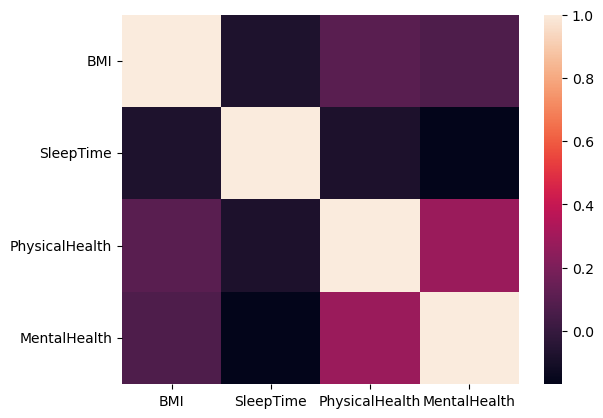

In [60]:
#Heatmap
sns.heatmap(data_analisisdiscriminante.loc[:,['BMI','SleepTime','PhysicalHealth','MentalHealth']].corr(method = "spearman"))
plt.show()

In [61]:
#Prueba de Correlación
#Ho: no existe correlación entre las variables
#Ha: existe correlación entre las variables
data_analisisdiscriminante.loc[:,['BMI','SleepTime','PhysicalHealth','MentalHealth']].corr(method = "spearman")

,BMI,SleepTime,PhysicalHealth,MentalHealth
BMI,1.000000,-0.077207,0.102259,0.071436
SleepTime,-0.077207,1.000000,-0.081552,-0.169252
PhysicalHealth,0.102259,-0.081552,1.000000,0.278675
MentalHealth,0.071436,-0.169252,0.278675,1.000000


In [62]:
ss.spearmanr(data_analisisdiscriminante['BMI'],data_analisisdiscriminante['SleepTime'])

SignificanceResult(statistic=-0.07720671514279652, pvalue=2.945040841153611e-07)

In [63]:
100*data_analisisdiscriminante['c_HeartDisease'].value_counts(normalize=True)

0    89.111162
1    10.888838
Name: c_HeartDisease, dtype: float64

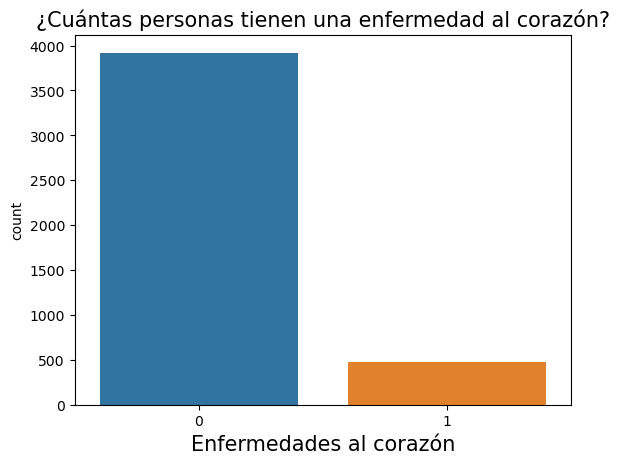

In [64]:
sns.countplot(data = data_analisisdiscriminante, x = 'c_HeartDisease')
plt.xlabel('Enfermedades al corazón', fontsize = 15)
plt.title('¿Cuántas personas tienen una enfermedad al corazón?', fontsize = 15)
plt.show()

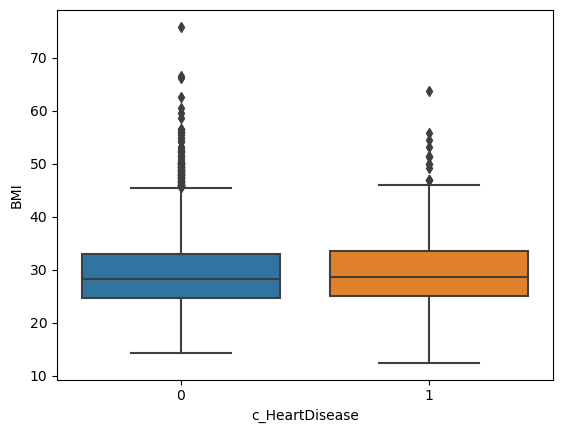

In [65]:
sns.boxplot(x='c_HeartDisease',y='BMI',data=data_analisisdiscriminante)
plt.show()

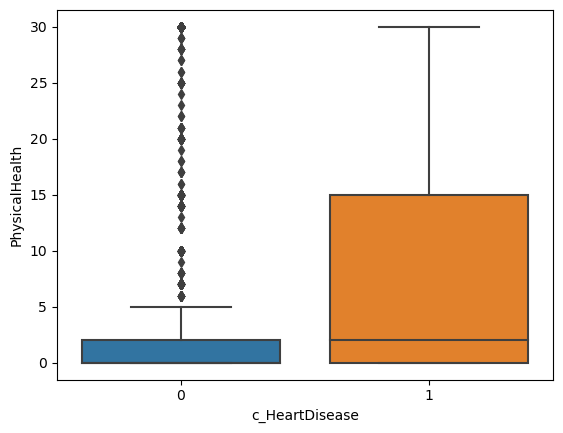

In [66]:
sns.boxplot(x='c_HeartDisease',y='PhysicalHealth',data=data_analisisdiscriminante)
plt.show()

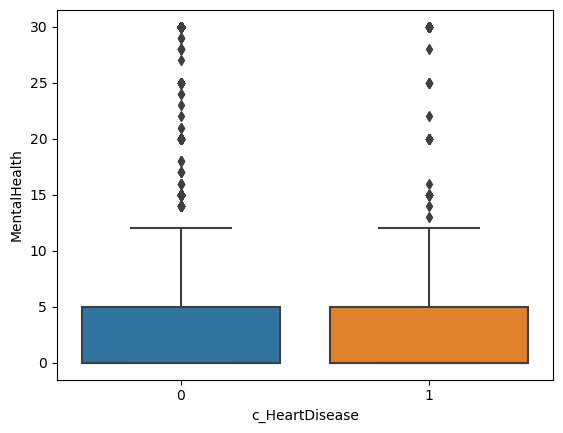

In [67]:
sns.boxplot(x='c_HeartDisease',y='MentalHealth',data=data_analisisdiscriminante)
plt.show()

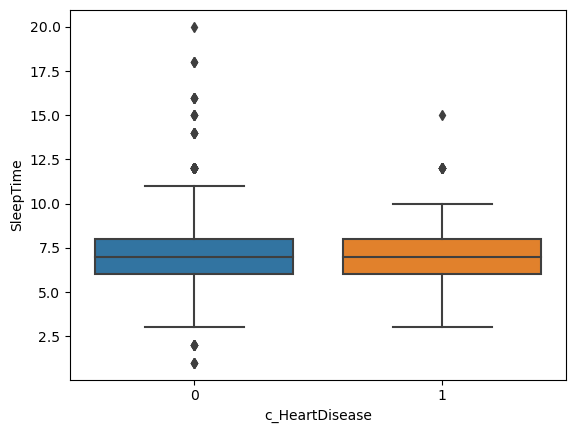

In [68]:
sns.boxplot(x='c_HeartDisease',y='SleepTime',data=data_analisisdiscriminante)
plt.show()

In [69]:
X_analisisdiscriminante = data_analisisdiscriminante[['BMI','MentalHealth','SleepTime','PhysicalHealth','c_Smoking','c_AlcoholDrinking','c_Stroke','c_DiffWalking','c_PhysicalActivity','c_Asthma','c_KidneyDisease','c_SkinCancer']]
y_analisisdiscriminante = data_analisisdiscriminante['c_HeartDisease']

In [70]:
X_analisisdiscriminante = X_analisisdiscriminante.to_numpy()

In [71]:
X_analisisdiscriminante[0:5]

array([[24.72,  0.  ,  8.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  ,  1.  ,
         0.  ,  0.  ,  0.  ],
       [26.63,  0.  ,  7.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  ,
         0.  ,  0.  ,  0.  ],
       [20.73,  0.  ,  5.  ,  7.  ,  0.  ,  0.  ,  0.  ,  1.  ,  1.  ,
         0.  ,  0.  ,  0.  ],
       [29.42,  0.  , 12.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  ,
         0.  ,  0.  ,  0.  ],
       [36.18,  0.  ,  6.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  ,
         0.  ,  0.  ,  0.  ]])

In [72]:
y_analisisdiscriminante = y_analisisdiscriminante.to_numpy()

In [73]:
y_analisisdiscriminante[0:5]

array([0, 0, 0, 0, 1])

In [74]:
X_train_analisisdiscriminante, X_test_analisisdiscriminante, y_train_analisisdiscriminante, y_test_analisisdiscriminante = train_test_split(X_analisisdiscriminante, y_analisisdiscriminante, test_size = 0.20, random_state = 0)

In [75]:
X_train_analisisdiscriminante[0:5]

array([[26.61,  0.  ,  7.  ,  5.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  ,
         0.  ,  0.  ,  0.  ],
       [43.26,  2.  ,  6.  ,  3.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.  ,
         1.  ,  0.  ,  0.  ],
       [27.71,  5.  ,  8.  ,  0.  ,  1.  ,  0.  ,  1.  ,  1.  ,  0.  ,
         0.  ,  0.  ,  0.  ],
       [25.1 ,  0.  ,  6.  , 14.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  ,
         0.  ,  0.  ,  0.  ],
       [33.44,  0.  ,  6.  ,  5.  ,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         1.  ,  0.  ,  0.  ]])

In [76]:
X_test_analisisdiscriminante[0:5]

array([[36.94, 30.  ,  4.  , 15.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.  ,
         0.  ,  0.  ,  0.  ],
       [28.19,  1.  , 10.  ,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  ,
         0.  ,  0.  ,  0.  ],
       [32.77,  0.  ,  7.  ,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ,  1.  ,
         0.  ,  0.  ,  0.  ],
       [30.21,  0.  ,  7.  ,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ,  1.  ,
         0.  ,  0.  ,  0.  ],
       [30.9 ,  5.  ,  6.  , 15.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.  ,
         0.  ,  1.  ,  0.  ]])

In [77]:
#Análisis Discriminante
classifierAnalisisDiscriminante = LinearDiscriminantAnalysis().fit(X_train_analisisdiscriminante, y_train_analisisdiscriminante)
#classifier = QuadraticDiscriminantAnalysis().fit(X_train, y_train)

In [78]:
y_pred_analisisdiscriminante = classifierAnalisisDiscriminante.predict(X_test_analisisdiscriminante)

In [79]:
y_pred_analisisdiscriminante[0:20]

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [80]:
y_test_analisisdiscriminante[0:20]

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [81]:
confusion_matrix(y_test_analisisdiscriminante, y_pred_analisisdiscriminante)

array([[765,  27],
       [ 73,  15]], dtype=int64)

Confusion matrix, without normalization
[[765  27]
 [ 73  15]]
Normalized confusion matrix
[[0.96590909 0.03409091]
 [0.82954545 0.17045455]]


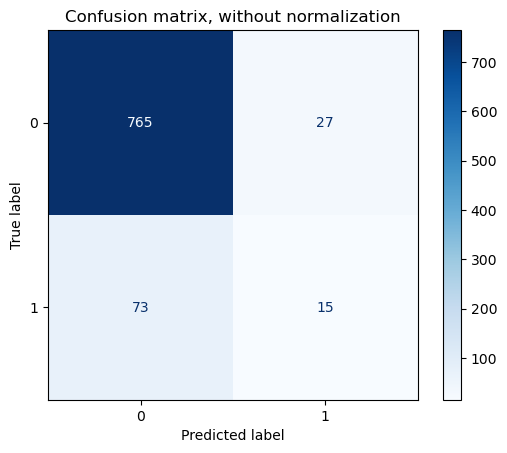

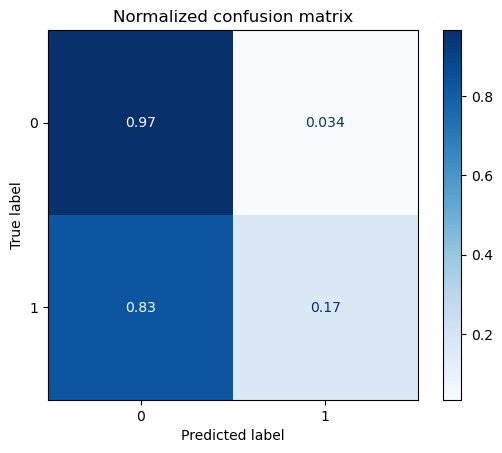

In [82]:
# Plot non-normalized confusion matrix
titles_options_analisisdiscriminante = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options_analisisdiscriminante:
    disp_analisisdiscriminante = ConfusionMatrixDisplay.from_estimator(classifierAnalisisDiscriminante, X_test_analisisdiscriminante, y_test_analisisdiscriminante,
                                                 #display_labels=y_test,
                                                 cmap=plt.cm.Blues,
                                                 normalize=normalize)
    disp_analisisdiscriminante.ax_.set_title(title)

    print(title)
    print(disp_analisisdiscriminante.confusion_matrix)

plt.show()
# Se observa una sensiblidad de 0.17, es decir, el modelo predice correctamente el 17% de los casos positivos.
# Se observa una especificidad de 0.97.

In [83]:
accuracy_analisisdiscriminante = (765 + 15) / (73 + 27 + 765 + 15)
print(accuracy_analisisdiscriminante)

0.8863636363636364


In [84]:
y_pred_prob_analisisdiscriminante = classifierAnalisisDiscriminante.predict_proba(X_test_analisisdiscriminante)

In [85]:
y_pred_prob_analisisdiscriminante[0:5]

array([[0.85155687, 0.14844313],
       [0.96979281, 0.03020719],
       [0.94590261, 0.05409739],
       [0.94565428, 0.05434572],
       [0.59174012, 0.40825988]])

In [86]:
y_pred_prob_analisisdiscriminante[0:5,1]

array([0.14844313, 0.03020719, 0.05409739, 0.05434572, 0.40825988])

In [87]:
false_positive_rateAnalisisDiscriminante, true_positive_rateAnalisisDiscriminante, thresholdsAnalisisDiscriminante = roc_curve(y_test_analisisdiscriminante, y_pred_prob_analisisdiscriminante[:,1])

In [88]:
roc_aucAnalisisDiscriminante = auc(false_positive_rateAnalisisDiscriminante, true_positive_rateAnalisisDiscriminante)
roc_aucAnalisisDiscriminante

0.72893709825528

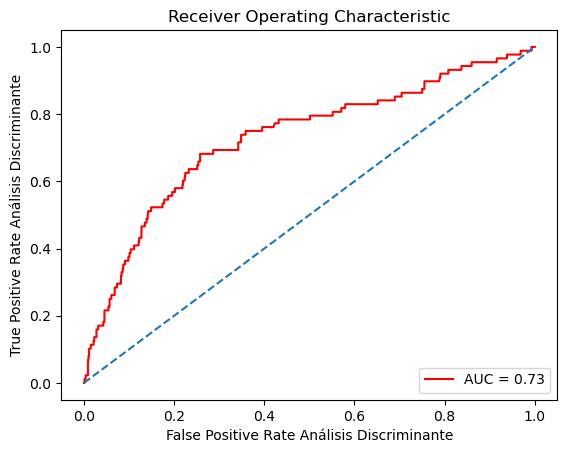

In [89]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rateAnalisisDiscriminante,true_positive_rateAnalisisDiscriminante, color='red',label = 'AUC = %0.2f' % roc_aucAnalisisDiscriminante)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate Análisis Discriminante')
plt.xlabel('False Positive Rate Análisis Discriminante')
plt.show()
#el modelo es capaz de distinguir entre las clases positiva y negativa con un 75% de precisión

In [90]:
print(classification_report(y_test_analisisdiscriminante, y_pred_analisisdiscriminante))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       792
           1       0.36      0.17      0.23        88

    accuracy                           0.89       880
   macro avg       0.64      0.57      0.58       880
weighted avg       0.86      0.89      0.87       880



In [91]:
dataf_analisisdiscriminante = pd.concat([pd.DataFrame(X_test_analisisdiscriminante),pd.DataFrame(y_test_analisisdiscriminante),pd.DataFrame(y_pred_analisisdiscriminante),pd.DataFrame(y_pred_prob_analisisdiscriminante)],axis=1)

In [92]:
dataf_analisisdiscriminante.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,0,0,0,1
0,36.94,30.0,4.0,15.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0.851557,0.148443
1,28.19,1.0,10.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0.969793,0.030207
2,32.77,0.0,7.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0.945903,0.054097
3,30.21,0.0,7.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0.945654,0.054346
4,30.90,5.0,6.0,15.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,0,0.591740,0.408260


In [93]:
dataf_analisisdiscriminante.columns = ['BMI','MentalHealth','SleepTime','PhysicalHealth','c_Smoking','c_AlcoholDrinking','c_Stroke','c_DiffWalking','c_PhysicalActivity','c_Asthma','c_KidneyDisease','c_SkinCancer','c_HeartDisease', 'c_HeartDisease_Pred', 'c_HeartDisease_Pred_Prob_0', 'c_HeartDisease_Pred_Prob_1']

In [94]:
dataf_analisisdiscriminante.head(10)

,BMI,MentalHealth,SleepTime,PhysicalHealth,c_Smoking,c_AlcoholDrinking,c_Stroke,c_DiffWalking,c_PhysicalActivity,c_Asthma,c_KidneyDisease,c_SkinCancer,c_HeartDisease,c_HeartDisease_Pred,c_HeartDisease_Pred_Prob_0,c_HeartDisease_Pred_Prob_1
0,36.94,30.0,4.0,15.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0.851557,0.148443
1,28.19,1.0,10.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0.969793,0.030207
2,32.77,0.0,7.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0.945903,0.054097
3,30.21,0.0,7.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0.945654,0.054346
4,30.90,5.0,6.0,15.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,0,0.591740,0.408260
5,40.51,1.0,6.0,2.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0,0,0.897266,0.102734
6,29.95,0.0,7.0,30.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,1,0.464083,0.535917
7,23.06,0.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0.971397,0.028603
8,26.45,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.890575,0.109425
9,32.89,0.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0,0,0.973102,0.026898


In [95]:
quantiles_analisisdiscriminante = dataf_analisisdiscriminante['c_HeartDisease_Pred_Prob_1'].quantile(q=[0.20,0.40,0.60,0.80])
quantiles_analisisdiscriminante

0.2    0.028796
0.4    0.039586
0.6    0.057058
0.8    0.148542
Name: c_HeartDisease_Pred_Prob_1, dtype: float64

In [96]:
#dataf_analisisdiscriminante.to_csv('dataf_analisisdiscriminante.csv', index = False)

## - 4.2. Regresión Logística

In [97]:
train_regresionlogistica = pd.read_csv('heart_2020_cleanedCorto80.csv')

In [98]:
train_regresionlogistica["flag_muestra"] = "train"

In [99]:
test_regresionlogistica = pd.read_csv('heart_2020_cleanedCorto20.csv')

In [100]:
test_regresionlogistica["flag_muestra"] = "test"

In [101]:
data_regresionlogistica = train_regresionlogistica.append(test_regresionlogistica)

C:\Users\steph\AppData\Local\Temp\ipykernel_24772\3451807138.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_regresionlogistica = train_regresionlogistica.append(test_regresionlogistica)


In [102]:
data_regresionlogistica['c_HeartDisease'] = LabelEncoder().fit_transform(data_regresionlogistica.HeartDisease.values)
data_regresionlogistica['c_Smoking'] = LabelEncoder().fit_transform(data_regresionlogistica.Smoking.values)
data_regresionlogistica['c_AlcoholDrinking'] = LabelEncoder().fit_transform(data_regresionlogistica.AlcoholDrinking.values)
data_regresionlogistica['c_Stroke'] = LabelEncoder().fit_transform(data_regresionlogistica.Stroke.values)
data_regresionlogistica['c_DiffWalking'] = LabelEncoder().fit_transform(data_regresionlogistica.DiffWalking.values)
data_regresionlogistica['c_PhysicalActivity'] = LabelEncoder().fit_transform(data_regresionlogistica.PhysicalActivity.values)
data_regresionlogistica['c_Asthma'] = LabelEncoder().fit_transform(data_regresionlogistica.Asthma.values)
data_regresionlogistica['c_KidneyDisease'] = LabelEncoder().fit_transform(data_regresionlogistica.KidneyDisease.values)
data_regresionlogistica['c_SkinCancer'] = LabelEncoder().fit_transform(data_regresionlogistica.SkinCancer.values)

In [103]:
data_regresionlogistica.head(5)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,flag_muestra,c_HeartDisease,c_Smoking,c_AlcoholDrinking,c_Stroke,c_DiffWalking,c_PhysicalActivity,c_Asthma,c_KidneyDisease,c_SkinCancer
0,No,24.72,No,No,No,0,0,Yes,Female,75-79,...,train,0,0,0,0,1,1,0,0,0
1,No,26.63,No,No,No,0,0,No,Male,75-79,...,train,0,0,0,0,0,1,0,0,0
2,No,20.73,No,No,No,7,0,Yes,Female,30-34,...,train,0,0,0,0,1,1,0,0,0
3,No,29.42,No,No,No,0,0,No,Male,70-74,...,train,0,0,0,0,0,1,0,0,0
4,Yes,36.18,No,No,No,0,0,No,Male,65-69,...,train,1,0,0,0,0,1,0,0,0


In [104]:
100*data_regresionlogistica['c_HeartDisease'].value_counts(normalize=True)

0    89.111162
1    10.888838
Name: c_HeartDisease, dtype: float64

In [105]:
X_regresionlogistica = data_regresionlogistica[['BMI','MentalHealth','SleepTime','PhysicalHealth','c_Smoking','c_AlcoholDrinking','c_Stroke','c_DiffWalking','c_PhysicalActivity','c_Asthma','c_KidneyDisease','c_SkinCancer']]
y_regresionlogistica = data_regresionlogistica['c_HeartDisease']

In [106]:
X_regresionlogistica = X_regresionlogistica.to_numpy()

In [107]:
X_regresionlogistica[0:5]

array([[24.72,  0.  ,  8.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  ,  1.  ,
         0.  ,  0.  ,  0.  ],
       [26.63,  0.  ,  7.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  ,
         0.  ,  0.  ,  0.  ],
       [20.73,  0.  ,  5.  ,  7.  ,  0.  ,  0.  ,  0.  ,  1.  ,  1.  ,
         0.  ,  0.  ,  0.  ],
       [29.42,  0.  , 12.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  ,
         0.  ,  0.  ,  0.  ],
       [36.18,  0.  ,  6.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  ,
         0.  ,  0.  ,  0.  ]])

In [108]:
y_regresionlogistica = y_regresionlogistica.to_numpy()

In [109]:
y_regresionlogistica[0:5]

array([0, 0, 0, 0, 1])

In [110]:
X_train_regresionlogistica, X_test_regresionlogistica, y_train_regresionlogistica, y_test_regresionlogistica = train_test_split(X_regresionlogistica, y_regresionlogistica, test_size = 0.20, random_state = 0)

In [111]:
X_train_regresionlogistica[0:5]

array([[26.61,  0.  ,  7.  ,  5.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  ,
         0.  ,  0.  ,  0.  ],
       [43.26,  2.  ,  6.  ,  3.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.  ,
         1.  ,  0.  ,  0.  ],
       [27.71,  5.  ,  8.  ,  0.  ,  1.  ,  0.  ,  1.  ,  1.  ,  0.  ,
         0.  ,  0.  ,  0.  ],
       [25.1 ,  0.  ,  6.  , 14.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  ,
         0.  ,  0.  ,  0.  ],
       [33.44,  0.  ,  6.  ,  5.  ,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         1.  ,  0.  ,  0.  ]])

In [112]:
X_test_regresionlogistica[0:5]

array([[36.94, 30.  ,  4.  , 15.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.  ,
         0.  ,  0.  ,  0.  ],
       [28.19,  1.  , 10.  ,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  ,
         0.  ,  0.  ,  0.  ],
       [32.77,  0.  ,  7.  ,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ,  1.  ,
         0.  ,  0.  ,  0.  ],
       [30.21,  0.  ,  7.  ,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ,  1.  ,
         0.  ,  0.  ,  0.  ],
       [30.9 ,  5.  ,  6.  , 15.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.  ,
         0.  ,  1.  ,  0.  ]])

In [113]:
#Regresión Logística
classifierRegresionLogistica = LogisticRegression(max_iter = 310000).fit(X_train_regresionlogistica, y_train_regresionlogistica)

In [114]:
y_pred_regresionlogistica = classifierRegresionLogistica.predict(X_test_regresionlogistica)

In [115]:
y_pred_regresionlogistica[0:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [116]:
y_test_regresionlogistica[0:20]

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [117]:
confusion_matrix(y_test_regresionlogistica, y_pred_regresionlogistica)

array([[783,   9],
       [ 79,   9]], dtype=int64)

Confusion matrix, without normalization
[[783   9]
 [ 79   9]]
Normalized confusion matrix
[[0.98863636 0.01136364]
 [0.89772727 0.10227273]]


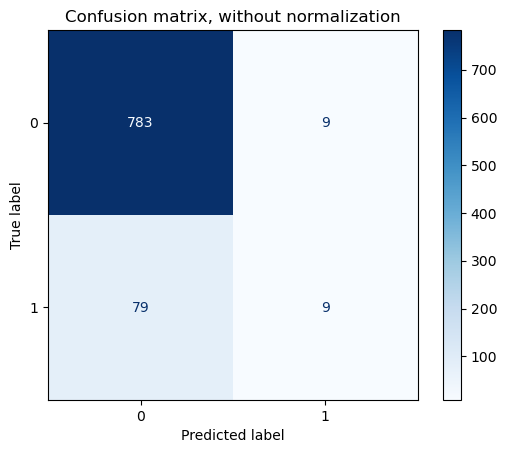

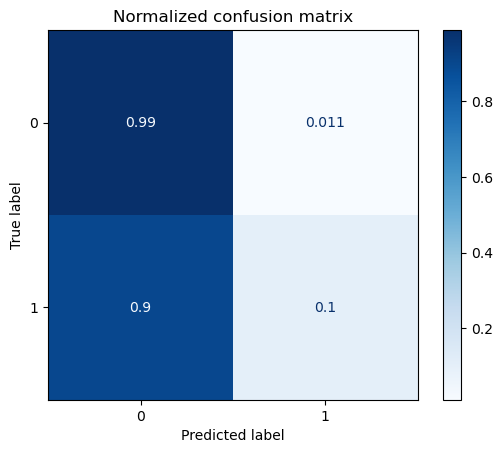

In [118]:
# Plot non-normalized confusion matrix
titles_options_regresionlogistica = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options_regresionlogistica:
    disp_regresionlogistica = ConfusionMatrixDisplay.from_estimator(classifierRegresionLogistica, X_test_regresionlogistica, y_test_regresionlogistica,
                                                 #display_labels=y_test,
                                                 cmap=plt.cm.Blues,
                                                 normalize=normalize)
    disp_regresionlogistica.ax_.set_title(title)

    print(title)
    print(disp_regresionlogistica.confusion_matrix)

plt.show()
# Se observa una sensiblidad de 0.1 
# y una especificidad de 0.99.

In [119]:
accuracy_regresionlogistica = (783 + 9) / (79 + 9 + 783 + 9)
print(accuracy_regresionlogistica)

0.9


In [120]:
y_pred_prob_regresionlogistica = classifierRegresionLogistica.predict_proba(X_test_regresionlogistica)

In [121]:
y_pred_prob_regresionlogistica[0:5]

array([[0.8553034 , 0.1446966 ],
       [0.95525848, 0.04474152],
       [0.91870497, 0.08129503],
       [0.91876543, 0.08123457],
       [0.72192574, 0.27807426]])

In [122]:
y_pred_prob_regresionlogistica[0:5,1]

array([0.1446966 , 0.04474152, 0.08129503, 0.08123457, 0.27807426])

In [123]:
false_positive_rateRegresionLogistica, true_positive_rateRegresionLogistica, thresholdsRegresionLogistica = roc_curve(y_test_regresionlogistica, y_pred_prob_regresionlogistica[:,1])

In [124]:
roc_aucRegresionLogistica = auc(false_positive_rateRegresionLogistica, true_positive_rateRegresionLogistica)
roc_aucRegresionLogistica

0.735608930211203

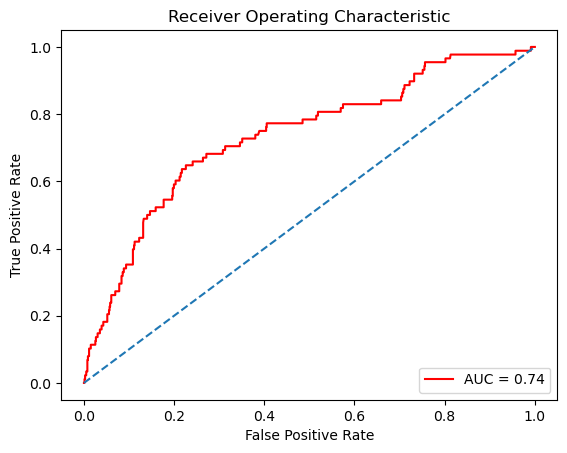

In [125]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rateRegresionLogistica,true_positive_rateRegresionLogistica, color='red',label = 'AUC = %0.2f' % roc_aucRegresionLogistica)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
#el modelo es capaz de distinguir entre las clases positiva y negativa con un 75% de precisión

In [126]:
print(classification_report(y_test_regresionlogistica, y_pred_regresionlogistica))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       792
           1       0.50      0.10      0.17        88

    accuracy                           0.90       880
   macro avg       0.70      0.55      0.56       880
weighted avg       0.87      0.90      0.87       880



In [127]:
dataf_regresionlogistica = pd.concat([pd.DataFrame(X_test_regresionlogistica),pd.DataFrame(y_test_regresionlogistica),pd.DataFrame(y_pred_regresionlogistica),pd.DataFrame(y_pred_prob_regresionlogistica)],axis=1)

In [128]:
dataf_regresionlogistica.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,0,0,0,1
0,36.94,30.0,4.0,15.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0.855303,0.144697
1,28.19,1.0,10.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0.955258,0.044742
2,32.77,0.0,7.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0.918705,0.081295
3,30.21,0.0,7.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0.918765,0.081235
4,30.90,5.0,6.0,15.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,0,0.721926,0.278074


In [129]:
dataf_regresionlogistica.columns = ['BMI','MentalHealth','SleepTime','PhysicalHealth','c_Smoking','c_AlcoholDrinking','c_Stroke','c_DiffWalking','c_PhysicalActivity','c_Asthma','c_KidneyDisease','c_SkinCancer','c_HeartDisease', 'c_HeartDisease_Pred', 'c_HeartDisease_Pred_Prob_0', 'c_HeartDisease_Pred_Prob_1']

In [130]:
dataf_regresionlogistica.head(10)

,BMI,MentalHealth,SleepTime,PhysicalHealth,c_Smoking,c_AlcoholDrinking,c_Stroke,c_DiffWalking,c_PhysicalActivity,c_Asthma,c_KidneyDisease,c_SkinCancer,c_HeartDisease,c_HeartDisease_Pred,c_HeartDisease_Pred_Prob_0,c_HeartDisease_Pred_Prob_1
0,36.94,30.0,4.0,15.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0.855303,0.144697
1,28.19,1.0,10.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0.955258,0.044742
2,32.77,0.0,7.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0.918705,0.081295
3,30.21,0.0,7.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0.918765,0.081235
4,30.90,5.0,6.0,15.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,0,0.721926,0.278074
5,40.51,1.0,6.0,2.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0,0,0.884599,0.115401
6,29.95,0.0,7.0,30.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,0,0.720269,0.279731
7,23.06,0.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0.956613,0.043387
8,26.45,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.896294,0.103706
9,32.89,0.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0,0,0.958436,0.041564


In [131]:
quantiles_regresionlogistica = dataf_regresionlogistica['c_HeartDisease_Pred_Prob_1'].quantile(q=[0.20,0.40,0.60,0.80])
quantiles_regresionlogistica

0.2    0.043649
0.4    0.056063
0.6    0.082041
0.8    0.153684
Name: c_HeartDisease_Pred_Prob_1, dtype: float64

## - 4.3. Naive Bayes

In [132]:
data_naivebayes = pd.read_csv('heart_2020_cleanedCorto.csv')

In [133]:
data_naivebayes.head(5)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


In [134]:
data_naivebayes['c_Smoking'] = LabelEncoder().fit_transform(data_naivebayes.Smoking.values)
data_naivebayes['c_AlcoholDrinking'] = LabelEncoder().fit_transform(data_naivebayes.AlcoholDrinking.values)
data_naivebayes['c_Stroke'] = LabelEncoder().fit_transform(data_naivebayes.Stroke.values)
data_naivebayes['c_DiffWalking'] = LabelEncoder().fit_transform(data_naivebayes.DiffWalking.values)
data_naivebayes['c_PhysicalActivity'] = LabelEncoder().fit_transform(data_naivebayes.PhysicalActivity.values)
data_naivebayes['c_Asthma'] = LabelEncoder().fit_transform(data_naivebayes.Asthma.values)
data_naivebayes['c_KidneyDisease'] = LabelEncoder().fit_transform(data_naivebayes.KidneyDisease.values)
data_naivebayes['c_SkinCancer'] = LabelEncoder().fit_transform(data_naivebayes.SkinCancer.values)
data_naivebayes['c_HeartDisease'] = LabelEncoder().fit_transform(data_naivebayes.HeartDisease.values)
data_naivebayes['c_HeartDisease'] = data_naivebayes['c_HeartDisease'].astype('int64')

In [135]:
data_naivebayes = data_naivebayes.drop(['HeartDisease','Smoking', 'AlcoholDrinking','Stroke','DiffWalking','PhysicalActivity','Asthma','KidneyDisease','SkinCancer'], axis=1)

In [136]:
data_naivebayes.dtypes

BMI                   float64
PhysicalHealth          int64
MentalHealth            int64
Sex                    object
AgeCategory            object
Race                   object
Diabetic               object
GenHealth              object
SleepTime               int64
c_Smoking               int32
c_AlcoholDrinking       int32
c_Stroke                int32
c_DiffWalking           int32
c_PhysicalActivity      int32
c_Asthma                int32
c_KidneyDisease         int32
c_SkinCancer            int32
c_HeartDisease          int64
dtype: object

In [137]:
X_naivebayes = data_naivebayes.iloc[:,[0,1,2,8,9,10,11,12,13,14,15,16]].values
y_naivebayes = data_naivebayes.iloc[:,-1].values

In [138]:
X_naivebayes[0:5]

array([[16.6 ,  3.  , 30.  ,  5.  ,  1.  ,  0.  ,  0.  ,  0.  ,  1.  ,
         1.  ,  0.  ,  1.  ],
       [20.34,  0.  ,  0.  ,  7.  ,  0.  ,  0.  ,  1.  ,  0.  ,  1.  ,
         0.  ,  0.  ,  0.  ],
       [26.58, 20.  , 30.  ,  8.  ,  1.  ,  0.  ,  0.  ,  0.  ,  1.  ,
         1.  ,  0.  ,  0.  ],
       [24.21,  0.  ,  0.  ,  6.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  1.  ],
       [23.71, 28.  ,  0.  ,  8.  ,  0.  ,  0.  ,  0.  ,  1.  ,  1.  ,
         0.  ,  0.  ,  0.  ]])

In [139]:
y_naivebayes[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [140]:
X_train_naivebayes, X_test_naivebayes, y_train_naivebayes, y_test_naivebayes = train_test_split(X_naivebayes, y_naivebayes, test_size = 0.20, random_state = 0)

In [141]:
X_train_naivebayes[0:5]

array([[30.27,  0.  ,  0.  ,  6.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  ,
         0.  ,  0.  ,  1.  ],
       [34.97, 25.  ,  0.  ,  6.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ],
       [23.62,  2.  ,  0.  ,  8.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  ,
         0.  ,  0.  ,  1.  ],
       [27.72, 30.  , 30.  ,  3.  ,  1.  ,  0.  ,  0.  ,  0.  ,  1.  ,
         1.  ,  0.  ,  1.  ],
       [25.06, 20.  , 30.  ,  8.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  ,
         0.  ,  0.  ,  0.  ]])

In [142]:
X_test_naivebayes[0:5]

array([[21.97,  0.  ,  0.  ,  6.  ,  1.  ,  1.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ],
       [38.73,  2.  , 30.  ,  5.  ,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ],
       [24.27,  0.  ,  0.  ,  8.  ,  0.  ,  1.  ,  0.  ,  0.  ,  1.  ,
         0.  ,  0.  ,  0.  ],
       [40.  ,  0.  ,  0.  ,  8.  ,  1.  ,  1.  ,  0.  ,  0.  ,  1.  ,
         1.  ,  0.  ,  0.  ],
       [17.57, 20.  ,  0.  ,  4.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ]])

In [143]:
X_train_orig_naivebayes = X_train_naivebayes
X_test_orig_naivebayes = X_test_naivebayes

In [144]:
X_train_naivebayes = StandardScaler().fit_transform(X_train_naivebayes)
X_test_naivebayes = StandardScaler().fit_transform(X_test_naivebayes)

In [145]:
X_train_naivebayes[0:5]

array([[ 0.13099123, -0.48575432, -0.52778061, -0.64260159, -0.86595363,
        -0.22250372, -0.24806947, -0.50230784,  0.63226682, -0.40506224,
        -0.22179944,  2.53766552],
       [ 0.83543974,  2.40677553, -0.52778061, -0.64260159, -0.86595363,
        -0.22250372, -0.24806947, -0.50230784, -1.58161074, -0.40506224,
        -0.22179944, -0.39406297],
       [-0.86572848, -0.25435193, -0.52778061,  0.59073083, -0.86595363,
        -0.22250372, -0.24806947, -0.50230784,  0.63226682, -0.40506224,
        -0.22179944,  2.53766552],
       [-0.25120956,  2.9852815 ,  2.89721318, -2.49260023,  1.15479625,
        -0.22250372, -0.24806947, -0.50230784,  0.63226682,  2.46875638,
        -0.22179944,  2.53766552],
       [-0.64989744,  1.82826956,  2.89721318,  0.59073083, -0.86595363,
        -0.22250372, -0.24806947, -0.50230784,  0.63226682, -0.40506224,
        -0.22179944, -0.39406297]])

In [146]:
X_test_naivebayes[0:5]

array([[-1.07727666, -0.46607149, -0.47569752, -0.69677502,  1.13651514,
         4.84194635, -0.23485288, -0.46779971, -1.5742493 , -0.43125842,
        -0.22387347, -0.34168885],
       [ 1.39905081, -0.23049256,  3.32297594, -1.35965287,  1.13651514,
        -0.20652852, -0.23485288, -0.46779971, -1.5742493 , -0.43125842,
        -0.22387347, -0.34168885],
       [-0.73744652, -0.46607149, -0.47569752,  0.62898069, -0.87988269,
         4.84194635, -0.23485288, -0.46779971,  0.6352234 , -0.43125842,
        -0.22387347, -0.34168885],
       [ 1.58669615, -0.46607149, -0.47569752,  0.62898069,  1.13651514,
         4.84194635, -0.23485288, -0.46779971,  0.6352234 ,  2.31879529,
        -0.22387347, -0.34168885],
       [-1.7273865 ,  1.88971779, -0.47569752, -2.02253073, -0.87988269,
        -0.20652852, -0.23485288, -0.46779971, -1.5742493 , -0.43125842,
        -0.22387347, -0.34168885]])

In [147]:
classifierNaiveBayes = GaussianNB().fit(X_train_naivebayes, y_train_naivebayes)

In [148]:
y_pred_naivebayes = classifierNaiveBayes.predict(X_test_naivebayes)

In [149]:
y_pred_naivebayes[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [150]:
y_test_naivebayes[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [151]:
confusion_matrix(y_test_naivebayes, y_pred_naivebayes)

array([[682,  80],
       [ 65,  53]], dtype=int64)

Confusion matrix, without normalization
[[682  80]
 [ 65  53]]
Normalized confusion matrix
[[0.89501312 0.10498688]
 [0.55084746 0.44915254]]


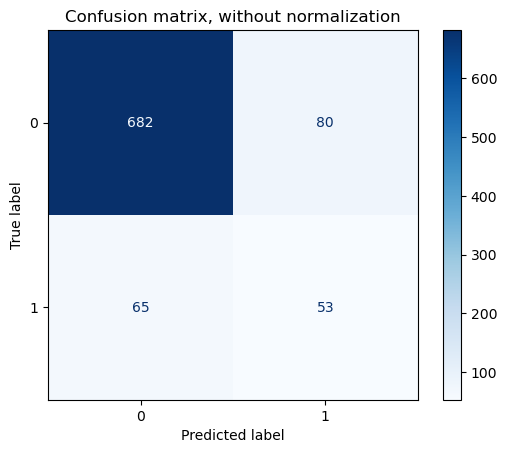

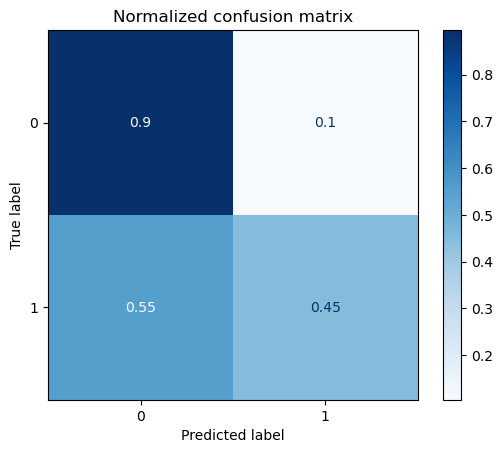

In [152]:
# Plot non-normalized confusion matrix
titles_options_naivebayes = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options_naivebayes:
    disp_naivebayes = ConfusionMatrixDisplay.from_estimator(classifierNaiveBayes, X_test_naivebayes, y_test_naivebayes,
                                                 #display_labels=y_test_naivebayes,
                                                 cmap=plt.cm.Blues,
                                                 normalize=normalize)
    disp_naivebayes.ax_.set_title(title)

    print(title)
    print(disp_naivebayes.confusion_matrix)

plt.show()
# Se observa una sensiblidad de 0.45
# y una especificidad de 0.9

In [153]:
accuracy_naivebayes = (682 + 53) / (65 + 80 + 682 + 53)
print(accuracy_naivebayes)

0.8352272727272727


In [154]:
y_pred_prob_naivebayes = classifierNaiveBayes.predict_proba(X_test_naivebayes)

In [155]:
y_pred_prob_naivebayes[0:5]

array([[9.99988434e-01, 1.15661535e-05],
       [9.07457501e-01, 9.25424990e-02],
       [9.99997469e-01, 2.53057968e-06],
       [9.99986632e-01, 1.33675141e-05],
       [9.45559640e-01, 5.44403597e-02]])

In [156]:
y_pred_prob_naivebayes[0:5,1]

array([1.15661535e-05, 9.25424990e-02, 2.53057968e-06, 1.33675141e-05,
       5.44403597e-02])

In [157]:
false_positive_rateNaiveBayes, true_positive_rateNaiveBayes, thresholdsNaiveBayes = roc_curve(y_test_naivebayes, y_pred_prob_naivebayes[:,1])

In [158]:
roc_aucNaiveBayes = auc(false_positive_rateNaiveBayes, true_positive_rateNaiveBayes)
roc_aucNaiveBayes

0.7698073757729437

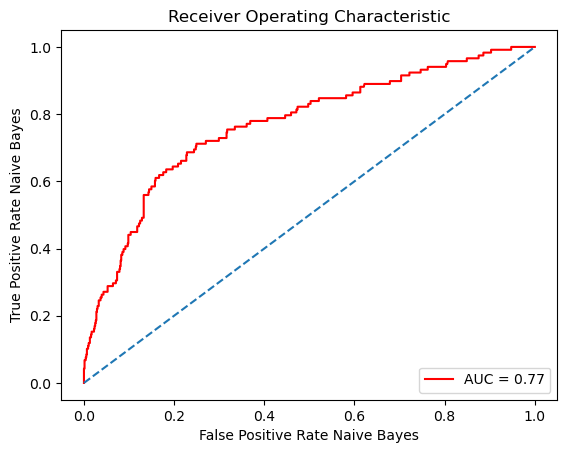

In [159]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rateNaiveBayes,true_positive_rateNaiveBayes, color='red',label = 'AUC = %0.2f' % roc_aucNaiveBayes)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate Naive Bayes')
plt.xlabel('False Positive Rate Naive Bayes')
plt.show()
#el modelo es capaz de distinguir entre las clases positiva y negativa con un 73% de precisión

In [160]:
dataf_naivebayes = pd.concat([pd.DataFrame(X_test_orig_naivebayes),pd.DataFrame(y_test_naivebayes),pd.DataFrame(y_pred_naivebayes),pd.DataFrame(y_pred_prob_naivebayes)],axis=1)

In [161]:
dataf_naivebayes.columns = ['BMI','MentalHealth','SleepTime','PhysicalHealth','c_Smoking','c_AlcoholDrinking','c_Stroke','c_DiffWalking','c_PhysicalActivity','c_Asthma','c_KidneyDisease','c_SkinCancer', 'c_HeartDisease', 'c_HeartDisease_Pred', 'c_HeartDisease_Pred_Prob_0', 'c_HeartDisease_Pred_Prob_1']

In [162]:
dataf_naivebayes.head(5)

,BMI,MentalHealth,SleepTime,PhysicalHealth,c_Smoking,c_AlcoholDrinking,c_Stroke,c_DiffWalking,c_PhysicalActivity,c_Asthma,c_KidneyDisease,c_SkinCancer,c_HeartDisease,c_HeartDisease_Pred,c_HeartDisease_Pred_Prob_0,c_HeartDisease_Pred_Prob_1
0,21.97,0.0,0.0,6.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.999988,0.000012
1,38.73,2.0,30.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.907458,0.092542
2,24.27,0.0,0.0,8.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0.999997,0.000003
3,40.00,0.0,0.0,8.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0,0,0.999987,0.000013
4,17.57,20.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.945560,0.054440


## - 4.4. KNN

In [163]:
dataKNN = pd.read_csv('heart_2020_cleanedCorto.csv')

In [164]:
dataKNN['c_Smoking'] = LabelEncoder().fit_transform(dataKNN.Smoking.values)
dataKNN['c_AlcoholDrinking'] = LabelEncoder().fit_transform(dataKNN.AlcoholDrinking.values)
dataKNN['c_Stroke'] = LabelEncoder().fit_transform(dataKNN.Stroke.values)
dataKNN['c_DiffWalking'] = LabelEncoder().fit_transform(dataKNN.DiffWalking.values)
dataKNN['c_PhysicalActivity'] = LabelEncoder().fit_transform(dataKNN.PhysicalActivity.values)
dataKNN['c_Asthma'] = LabelEncoder().fit_transform(dataKNN.Asthma.values)
dataKNN['c_KidneyDisease'] = LabelEncoder().fit_transform(dataKNN.KidneyDisease.values)
dataKNN['c_SkinCancer'] = LabelEncoder().fit_transform(dataKNN.SkinCancer.values)
dataKNN['c_HeartDisease'] = LabelEncoder().fit_transform(dataKNN.HeartDisease.values)

In [165]:
dataKNN['c_HeartDisease'] = dataKNN['c_HeartDisease'].astype('int64')

In [166]:
dataKNN = dataKNN.drop(['HeartDisease','Smoking', 'AlcoholDrinking','Stroke','DiffWalking','PhysicalActivity','Asthma','KidneyDisease','SkinCancer'], axis=1)

In [167]:
dataKNN.dtypes

BMI                   float64
PhysicalHealth          int64
MentalHealth            int64
Sex                    object
AgeCategory            object
Race                   object
Diabetic               object
GenHealth              object
SleepTime               int64
c_Smoking               int32
c_AlcoholDrinking       int32
c_Stroke                int32
c_DiffWalking           int32
c_PhysicalActivity      int32
c_Asthma                int32
c_KidneyDisease         int32
c_SkinCancer            int32
c_HeartDisease          int64
dtype: object

In [168]:
X_KNN = dataKNN.iloc[:,[0,1,2,8,9,10,11,12,13,14,15,16,17]].values
y_KNN = dataKNN.iloc[:,-1].values

In [169]:
X_KNN[0:5]

array([[16.6 ,  3.  , 30.  ,  5.  ,  1.  ,  0.  ,  0.  ,  0.  ,  1.  ,
         1.  ,  0.  ,  1.  ,  0.  ],
       [20.34,  0.  ,  0.  ,  7.  ,  0.  ,  0.  ,  1.  ,  0.  ,  1.  ,
         0.  ,  0.  ,  0.  ,  0.  ],
       [26.58, 20.  , 30.  ,  8.  ,  1.  ,  0.  ,  0.  ,  0.  ,  1.  ,
         1.  ,  0.  ,  0.  ,  0.  ],
       [24.21,  0.  ,  0.  ,  6.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  1.  ,  0.  ],
       [23.71, 28.  ,  0.  ,  8.  ,  0.  ,  0.  ,  0.  ,  1.  ,  1.  ,
         0.  ,  0.  ,  0.  ,  0.  ]])

In [170]:
y_KNN[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [171]:
X_train_KNN, X_test_KNN, y_train_KNN, y_test_KNN = train_test_split(X_KNN, y_KNN, test_size = 0.20, random_state = 0)

In [172]:
X_train_KNN[0:5]

array([[30.27,  0.  ,  0.  ,  6.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  ,
         0.  ,  0.  ,  1.  ,  0.  ],
       [34.97, 25.  ,  0.  ,  6.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  1.  ],
       [23.62,  2.  ,  0.  ,  8.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  ,
         0.  ,  0.  ,  1.  ,  1.  ],
       [27.72, 30.  , 30.  ,  3.  ,  1.  ,  0.  ,  0.  ,  0.  ,  1.  ,
         1.  ,  0.  ,  1.  ,  1.  ],
       [25.06, 20.  , 30.  ,  8.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  ,
         0.  ,  0.  ,  0.  ,  0.  ]])

In [173]:
X_test_KNN[0:5]

array([[21.97,  0.  ,  0.  ,  6.  ,  1.  ,  1.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ],
       [38.73,  2.  , 30.  ,  5.  ,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ],
       [24.27,  0.  ,  0.  ,  8.  ,  0.  ,  1.  ,  0.  ,  0.  ,  1.  ,
         0.  ,  0.  ,  0.  ,  0.  ],
       [40.  ,  0.  ,  0.  ,  8.  ,  1.  ,  1.  ,  0.  ,  0.  ,  1.  ,
         1.  ,  0.  ,  0.  ,  0.  ],
       [17.57, 20.  ,  0.  ,  4.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ]])

In [174]:
X_train_orig_KNN = X_train_KNN 
X_test_orig_KNN = X_test_KNN

In [175]:
X_train_KNN = StandardScaler().fit_transform(X_train_KNN)
X_test_KNN = StandardScaler().fit_transform(X_test_KNN)

In [176]:
X_train_KNN[0:5]

array([[ 0.13099123, -0.48575432, -0.52778061, -0.64260159, -0.86595363,
        -0.22250372, -0.24806947, -0.50230784,  0.63226682, -0.40506224,
        -0.22179944,  2.53766552, -0.33810184],
       [ 0.83543974,  2.40677553, -0.52778061, -0.64260159, -0.86595363,
        -0.22250372, -0.24806947, -0.50230784, -1.58161074, -0.40506224,
        -0.22179944, -0.39406297,  2.9576887 ],
       [-0.86572848, -0.25435193, -0.52778061,  0.59073083, -0.86595363,
        -0.22250372, -0.24806947, -0.50230784,  0.63226682, -0.40506224,
        -0.22179944,  2.53766552,  2.9576887 ],
       [-0.25120956,  2.9852815 ,  2.89721318, -2.49260023,  1.15479625,
        -0.22250372, -0.24806947, -0.50230784,  0.63226682,  2.46875638,
        -0.22179944,  2.53766552,  2.9576887 ],
       [-0.64989744,  1.82826956,  2.89721318,  0.59073083, -0.86595363,
        -0.22250372, -0.24806947, -0.50230784,  0.63226682, -0.40506224,
        -0.22179944, -0.39406297, -0.33810184]])

In [177]:
X_test_KNN[0:5]

array([[-1.07727666, -0.46607149, -0.47569752, -0.69677502,  1.13651514,
         4.84194635, -0.23485288, -0.46779971, -1.5742493 , -0.43125842,
        -0.22387347, -0.34168885, -0.39351702],
       [ 1.39905081, -0.23049256,  3.32297594, -1.35965287,  1.13651514,
        -0.20652852, -0.23485288, -0.46779971, -1.5742493 , -0.43125842,
        -0.22387347, -0.34168885, -0.39351702],
       [-0.73744652, -0.46607149, -0.47569752,  0.62898069, -0.87988269,
         4.84194635, -0.23485288, -0.46779971,  0.6352234 , -0.43125842,
        -0.22387347, -0.34168885, -0.39351702],
       [ 1.58669615, -0.46607149, -0.47569752,  0.62898069,  1.13651514,
         4.84194635, -0.23485288, -0.46779971,  0.6352234 ,  2.31879529,
        -0.22387347, -0.34168885, -0.39351702],
       [-1.7273865 ,  1.88971779, -0.47569752, -2.02253073, -0.87988269,
        -0.20652852, -0.23485288, -0.46779971, -1.5742493 , -0.43125842,
        -0.22387347, -0.34168885, -0.39351702]])

In [178]:
#KNN
#classifierKNN = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)

In [179]:
#Validación Cruzada
#validación cruzada = 5 folds
cv_scores_KNN = cross_val_score(KNeighborsClassifier(n_neighbors=5), X_KNN, y_KNN, cv=5)

In [180]:
#Accuracy
print(cv_scores_KNN)

[0.91022727 0.89204545 0.89886364 0.89886364 0.89988623]


In [181]:
#Accuracy Promedio
#accuracy de valdiación cruzada->este tomar en cuenta
print("cv_scores mean:{}".format(np.mean(cv_scores_KNN)))

cv_scores mean:0.8999772468714449


In [182]:
k_vecinos_KNN = list(range(1, 41))
print(k_vecinos_KNN)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]


In [183]:
param_grid_KNN = {'n_neighbors':k_vecinos_KNN}

In [184]:
grid_KNN = GridSearchCV(KNeighborsClassifier(),param_grid_KNN,refit=True,verbose=3,cv=5,scoring='accuracy')
grid_KNN.fit(X_train_KNN,y_train_KNN)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV 1/5] END .....................n_neighbors=1;, score=0.997 total time=   0.0s
[CV 2/5] END .....................n_neighbors=1;, score=0.999 total time=   0.0s
[CV 3/5] END .....................n_neighbors=1;, score=0.996 total time=   0.0s
[CV 4/5] END .....................n_neighbors=1;, score=0.999 total time=   0.0s
[CV 5/5] END .....................n_neighbors=1;, score=0.996 total time=   0.0s
[CV 1/5] END .....................n_neighbors=2;, score=0.994 total time=   0.0s
[CV 2/5] END .....................n_neighbors=2;, score=0.994 total time=   0.0s
[CV 3/5] END .....................n_neighbors=2;, score=0.994 total time=   0.0s
[CV 4/5] END .....................n_neighbors=2;, score=0.999 total time=   0.0s
[CV 5/5] END .....................n_neighbors=2;, score=0.994 total time=   0.0s
[CV 1/5] END .....................n_neighbors=3;, score=0.997 total time=   0.0s
[CV 2/5] END .....................n_neighbors=3

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]},
             scoring='accuracy', verbose=3)

In [185]:
#plot_grid_search(grid)
#table_grid_search(clf)

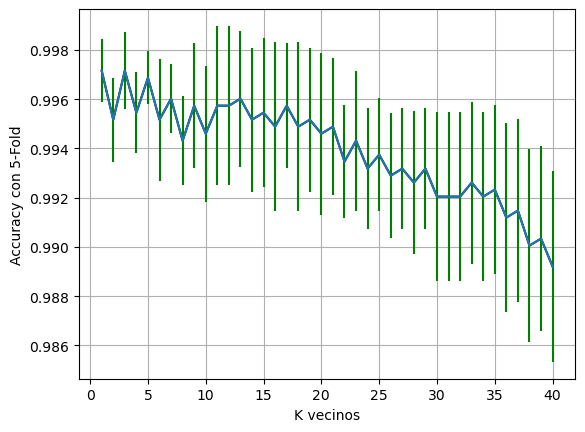

In [186]:
scores_KNN = np.array (grid_KNN.cv_results_['mean_test_score'])
stdvalues = np.array (grid_KNN.cv_results_['std_test_score'])
plt.plot (k_vecinos_KNN, scores_KNN, '-0') # sin que dibuje los puntos 0
plt.errorbar (k_vecinos_KNN, scores_KNN, yerr = stdvalues, ecolor = 'g') # con barras de error
plt.xlabel ('K vecinos')
plt.ylabel ('Accuracy con 5-Fold')
plt.grid ()
plt.show ()
#escanarios están en eje. 

In [187]:
print(grid_KNN.best_estimator_)
#K vecinos es el mejor estimador para este caso es 5

KNeighborsClassifier(n_neighbors=1)


In [188]:
classifierKNN = KNeighborsClassifier(n_neighbors=1).fit(X_train_KNN, y_train_KNN)

In [189]:
#Evaluación
y_pred_KNN = classifierKNN.predict(X_test_KNN)

In [190]:
y_pred_KNN[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [191]:
y_test_KNN[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [192]:
confusion_matrix(y_test_KNN, y_pred_KNN)

array([[762,   0],
       [  2, 116]], dtype=int64)

Confusion matrix, without normalization
[[762   0]
 [  2 116]]
Normalized confusion matrix
[[1.         0.        ]
 [0.01694915 0.98305085]]


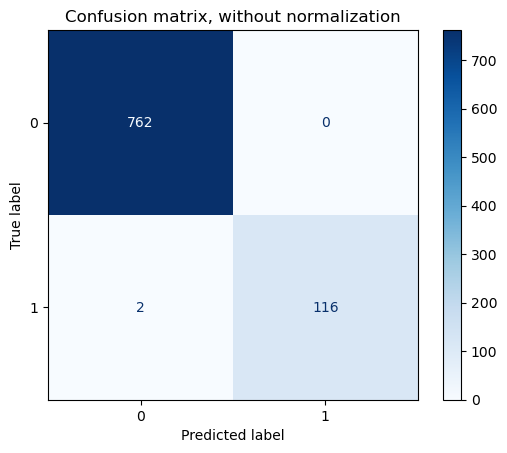

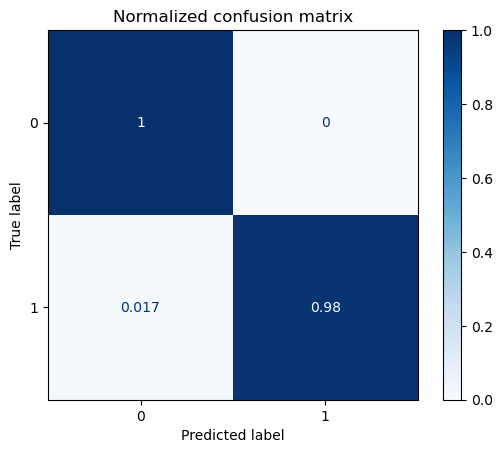

In [193]:
# Plot non-normalized confusion matrix
titles_options_KNN = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options_KNN:
    disp_KNN = ConfusionMatrixDisplay.from_estimator(classifierKNN, X_test_KNN, y_test_KNN,
                                                 #display_labels=y_test,
                                                 cmap=plt.cm.Blues,
                                                 normalize=normalize)
    disp_KNN.ax_.set_title(title)

    print(title)
    print(disp_KNN.confusion_matrix)

plt.show()
#sensibilidad 0.98
#especificidad 1

In [332]:
Accuracy_KNN = (762 + 116)/(2 + 0 + 762 + 116)
print(Accuracy_KNN)

0.9977272727272727


In [195]:
y_pred_prob_KNN = classifierKNN.predict_proba(X_test_KNN)

In [196]:
y_pred_prob_KNN[0:5]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [197]:
y_pred_prob_KNN[0:5,1]

array([0., 0., 0., 0., 0.])

In [198]:
false_positive_rateKNN, true_positive_rateKNN, thresholdsKNN = roc_curve(y_test_KNN, y_pred_prob_KNN[:,1])

In [199]:
roc_aucKNN = auc(false_positive_rateKNN, true_positive_rateKNN)
roc_aucKNN

0.9915254237288136

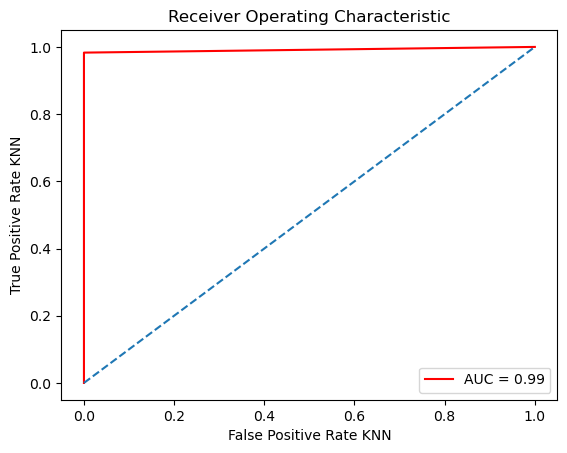

In [200]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rateKNN,true_positive_rateKNN, color='red',label = 'AUC = %0.2f' % roc_aucKNN)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate KNN')
plt.xlabel('False Positive Rate KNN')
plt.show()

In [201]:
dataf_KNN = pd.concat([pd.DataFrame(X_test_orig_KNN),pd.DataFrame(y_test_KNN),pd.DataFrame(y_pred_KNN),pd.DataFrame(y_pred_prob_KNN)],axis=1)

In [202]:
dataf_KNN.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,0,0,0,1
0,21.97,0.0,0.0,6.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1.0,0.0
1,38.73,2.0,30.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1.0,0.0
2,24.27,0.0,0.0,8.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,1.0,0.0
3,40.00,0.0,0.0,8.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0,0,1.0,0.0
4,17.57,20.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1.0,0.0


## - 4.5. Redes Neuronales Artificiales

In [203]:
data_redes = pd.read_csv('heart_2020_cleanedCorto.csv')

In [204]:
data_redes['c_Smoking'] = LabelEncoder().fit_transform(data_redes.Smoking.values)
data_redes['c_AlcoholDrinking'] = LabelEncoder().fit_transform(data_redes.AlcoholDrinking.values)
data_redes['c_Stroke'] = LabelEncoder().fit_transform(data_redes.Stroke.values)
data_redes['c_DiffWalking'] = LabelEncoder().fit_transform(data_redes.DiffWalking.values)
data_redes['c_PhysicalActivity'] = LabelEncoder().fit_transform(data_redes.PhysicalActivity.values)
data_redes['c_Asthma'] = LabelEncoder().fit_transform(data_redes.Asthma.values)
data_redes['c_KidneyDisease'] = LabelEncoder().fit_transform(data_redes.KidneyDisease.values)
data_redes['c_SkinCancer'] = LabelEncoder().fit_transform(data_redes.SkinCancer.values)
data_redes['c_HeartDisease'] = LabelEncoder().fit_transform(data_redes.HeartDisease.values)
data_redes['c_HeartDisease'] = data_redes['c_HeartDisease'].astype('int64')

In [205]:
data_redes = data_redes.drop(['HeartDisease','Smoking', 'AlcoholDrinking','Stroke','DiffWalking','PhysicalActivity','Asthma','KidneyDisease','SkinCancer'], axis=1)

In [206]:
data_redes['c_HeartDisease'] = data_redes['c_HeartDisease'].astype('int64')

In [207]:
data_redes.c_HeartDisease.value_counts()

0    3920
1     479
Name: c_HeartDisease, dtype: int64

In [208]:
100*data_redes['c_HeartDisease'].value_counts(normalize=True)

0    89.111162
1    10.888838
Name: c_HeartDisease, dtype: float64

In [209]:
data_redes.head()

,BMI,PhysicalHealth,MentalHealth,Sex,AgeCategory,Race,Diabetic,GenHealth,SleepTime,c_Smoking,c_AlcoholDrinking,c_Stroke,c_DiffWalking,c_PhysicalActivity,c_Asthma,c_KidneyDisease,c_SkinCancer,c_HeartDisease
0,16.60,3,30,Female,55-59,White,Yes,Very good,5,1,0,0,0,1,1,0,1,0
1,20.34,0,0,Female,80 or older,White,No,Very good,7,0,0,1,0,1,0,0,0,0
2,26.58,20,30,Male,65-69,White,Yes,Fair,8,1,0,0,0,1,1,0,0,0
3,24.21,0,0,Female,75-79,White,No,Good,6,0,0,0,0,0,0,0,1,0
4,23.71,28,0,Female,40-44,White,No,Very good,8,0,0,0,1,1,0,0,0,0


In [210]:
X_redes = data_redes[['BMI','MentalHealth','SleepTime','PhysicalHealth','c_Smoking','c_AlcoholDrinking','c_Stroke','c_DiffWalking','c_PhysicalActivity','c_Asthma','c_KidneyDisease','c_SkinCancer']]
y_redes = data_redes['c_HeartDisease']

In [211]:
X_redes = X_redes.to_numpy()

In [212]:
X_redes[0:5]

array([[16.6 , 30.  ,  5.  ,  3.  ,  1.  ,  0.  ,  0.  ,  0.  ,  1.  ,
         1.  ,  0.  ,  1.  ],
       [20.34,  0.  ,  7.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.  ,  1.  ,
         0.  ,  0.  ,  0.  ],
       [26.58, 30.  ,  8.  , 20.  ,  1.  ,  0.  ,  0.  ,  0.  ,  1.  ,
         1.  ,  0.  ,  0.  ],
       [24.21,  0.  ,  6.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  1.  ],
       [23.71,  0.  ,  8.  , 28.  ,  0.  ,  0.  ,  0.  ,  1.  ,  1.  ,
         0.  ,  0.  ,  0.  ]])

In [213]:
y_redes = y_redes.to_numpy()

In [214]:
y_redes[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [215]:
X_train_redes, X_test_redes, y_train_redes, y_test_redes = train_test_split(X_redes, y_redes, test_size = 0.20, random_state = 0)

In [216]:
X_train_redes[0:5]

array([[30.27,  0.  ,  6.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  ,
         0.  ,  0.  ,  1.  ],
       [34.97,  0.  ,  6.  , 25.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ],
       [23.62,  0.  ,  8.  ,  2.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  ,
         0.  ,  0.  ,  1.  ],
       [27.72, 30.  ,  3.  , 30.  ,  1.  ,  0.  ,  0.  ,  0.  ,  1.  ,
         1.  ,  0.  ,  1.  ],
       [25.06, 30.  ,  8.  , 20.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  ,
         0.  ,  0.  ,  0.  ]])

In [217]:
X_test_redes[0:5]

array([[21.97,  0.  ,  6.  ,  0.  ,  1.  ,  1.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ],
       [38.73, 30.  ,  5.  ,  2.  ,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ],
       [24.27,  0.  ,  8.  ,  0.  ,  0.  ,  1.  ,  0.  ,  0.  ,  1.  ,
         0.  ,  0.  ,  0.  ],
       [40.  ,  0.  ,  8.  ,  0.  ,  1.  ,  1.  ,  0.  ,  0.  ,  1.  ,
         1.  ,  0.  ,  0.  ],
       [17.57,  0.  ,  4.  , 20.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ]])

In [218]:
X_train_orig_redes = X_train_redes
X_test_orig_redes = X_test_redes

In [219]:
X_train_redes = StandardScaler().fit_transform(X_train_redes)
X_test_redes = StandardScaler().fit_transform(X_test_redes)

In [220]:
X_train_redes[0:5]

array([[ 0.13099123, -0.52778061, -0.64260159, -0.48575432, -0.86595363,
        -0.22250372, -0.24806947, -0.50230784,  0.63226682, -0.40506224,
        -0.22179944,  2.53766552],
       [ 0.83543974, -0.52778061, -0.64260159,  2.40677553, -0.86595363,
        -0.22250372, -0.24806947, -0.50230784, -1.58161074, -0.40506224,
        -0.22179944, -0.39406297],
       [-0.86572848, -0.52778061,  0.59073083, -0.25435193, -0.86595363,
        -0.22250372, -0.24806947, -0.50230784,  0.63226682, -0.40506224,
        -0.22179944,  2.53766552],
       [-0.25120956,  2.89721318, -2.49260023,  2.9852815 ,  1.15479625,
        -0.22250372, -0.24806947, -0.50230784,  0.63226682,  2.46875638,
        -0.22179944,  2.53766552],
       [-0.64989744,  2.89721318,  0.59073083,  1.82826956, -0.86595363,
        -0.22250372, -0.24806947, -0.50230784,  0.63226682, -0.40506224,
        -0.22179944, -0.39406297]])

In [221]:
X_test_redes[0:5]

array([[-1.07727666, -0.47569752, -0.69677502, -0.46607149,  1.13651514,
         4.84194635, -0.23485288, -0.46779971, -1.5742493 , -0.43125842,
        -0.22387347, -0.34168885],
       [ 1.39905081,  3.32297594, -1.35965287, -0.23049256,  1.13651514,
        -0.20652852, -0.23485288, -0.46779971, -1.5742493 , -0.43125842,
        -0.22387347, -0.34168885],
       [-0.73744652, -0.47569752,  0.62898069, -0.46607149, -0.87988269,
         4.84194635, -0.23485288, -0.46779971,  0.6352234 , -0.43125842,
        -0.22387347, -0.34168885],
       [ 1.58669615, -0.47569752,  0.62898069, -0.46607149,  1.13651514,
         4.84194635, -0.23485288, -0.46779971,  0.6352234 ,  2.31879529,
        -0.22387347, -0.34168885],
       [-1.7273865 , -0.47569752, -2.02253073,  1.88971779, -0.87988269,
        -0.20652852, -0.23485288, -0.46779971, -1.5742493 , -0.43125842,
        -0.22387347, -0.34168885]])

In [222]:
#Tuning
param_grid_redes = {
    'hidden_layer_sizes': [(10,30,10),(20,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [223]:
grid_redes = GridSearchCV(MLPClassifier(max_iter=500),param_grid_redes,refit=True,verbose=2,cv=5)
grid_redes.fit(X_train_redes,y_train_redes)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd; total time=   0.9s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd; total time=   1.3s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd; total time=   0.8s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd; total time=   1.2s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd; total time=   0.9s


c:\Users\steph\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam; total time=   4.3s


c:\Users\steph\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam; total time=   3.9s


c:\Users\steph\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam; total time=   3.8s


c:\Users\steph\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam; total time=   3.8s


c:\Users\steph\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam; total time=   3.9s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=sgd; total time=   1.1s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=sgd; total time=   1.2s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=sgd; total time=   0.9s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=sgd; total time=   0.8s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=sgd; total time=   0.9s


c:\Users\steph\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam; total time=   3.8s


c:\Users\steph\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam; total time=   3.9s


c:\Users\steph\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam; total time=   3.9s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam; total time=   3.1s


c:\Users\steph\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam; total time=   3.8s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd; total time=   0.3s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd; total time=   0.2s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd; total time=   0.3s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd; total time=   0.3s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd; total time=   0.2s


c:\Users\steph\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam; total time=   2.1s


c:\Users\steph\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam; total time=   2.1s


c:\Users\steph\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam; total time=   2.1s


c:\Users\steph\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam; total time=   2.1s


c:\Users\steph\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam; total time=   2.1s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd; total time=   0.6s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd; total time=   0.5s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd; total time=   0.5s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd; total time=   0.4s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd; total time=   0.5s


c:\Users\steph\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam; total time=   2.0s


c:\Users\steph\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam; total time=   2.0s


c:\Users\steph\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam; total time=   2.0s


c:\Users\steph\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam; total time=   2.1s


c:\Users\steph\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam; total time=   2.1s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd; total time=   0.7s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd; total time=   0.7s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd; total time=   0.7s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd; total time=   0.7s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd; total time=   0.7s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam; total time=   2.5s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam; total time=  

c:\Users\steph\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam; total time=   2.1s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam; total time=   0.9s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam; total time=   1.7s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam; total time=   1.1s


c:\Users\steph\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam; total time=   2.1s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd; total time=   0.6s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd; total time=   0.5s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd; total time=   0.5s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd; total time=   0.5s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd; total time=   0.5s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam; total time=   1.9s


c:\Users\steph\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam; total time=   2.1s


c:\Users\steph\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam; total time=   2.0s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam; total time=   1.6s


c:\Users\steph\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam; total time=   2.0s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd; total time=   1.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd; total time=   1.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd; total time=   0.8s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd; total time=   1.4s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd; total time=   1.0s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam; total time=   3.4s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam; t

c:\Users\steph\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam; total time=   3.4s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam; total time=   2.9s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=sgd; total time=   1.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=sgd; total time=   1.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=sgd; total time=   1.3s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=sgd; total time=   1.3s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=sgd; total time=   1.4s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solve

c:\Users\steph\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam; total time=   3.4s


c:\Users\steph\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam; total time=   3.4s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam; total time=   2.7s


c:\Users\steph\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam; total time=   3.4s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd; total time=   0.4s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd; total time=   0.4s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd; total time=   0.4s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd; total time=   0.4s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam; total time=   1.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam; total time=   1.0s
[CV] END activation=re

c:\Users\steph\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam; total time=   1.8s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam; total time=   1.1s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd; total time=   0.9s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd; total time=   0.9s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd; total time=   1.0s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd; total time=   0.8s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd; total time=   0.9s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam; total time=   3.1s

c:\Users\steph\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam; total time=   3.3s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=sgd; total time=   1.5s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=sgd; total time=   1.1s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=sgd; total time=   1.3s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=sgd; total time=   1.2s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=sgd; total time=   1.4s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam; total time=   1.9s


c:\Users\steph\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam; total time=   3.3s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam; total time=   2.2s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam; total time=   3.2s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam; total time=   3.1s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd; total time=   0.4s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd; total time=   0.4s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd; total time=   0.3s
[CV] END activat

GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=500),
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(10, 30, 10), (20,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']},
             verbose=2)

In [224]:
print(grid_redes.best_estimator_)

MLPClassifier(activation='tanh', alpha=0.05, hidden_layer_sizes=(20,),
              learning_rate='adaptive', max_iter=500, solver='sgd')


In [225]:
#Redes Neuronales Artificiales
classifierRedesNeuronales = MLPClassifier(activation='tanh', alpha=0.05, hidden_layer_sizes=(10, 30, 10),
              max_iter=500).fit(X_train_redes, y_train_redes)

In [226]:
#Evaluación
y_pred_redes = classifierRedesNeuronales.predict(X_test_redes)

In [227]:
y_pred_redes[0:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
      dtype=int64)

In [228]:
y_test_redes[0:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
      dtype=int64)

In [229]:
confusion_matrix(y_test_redes, y_pred_redes)

array([[747,  15],
       [101,  17]], dtype=int64)

Confusion matrix, without normalization
[[747  15]
 [101  17]]
Normalized confusion matrix
[[0.98031496 0.01968504]
 [0.8559322  0.1440678 ]]


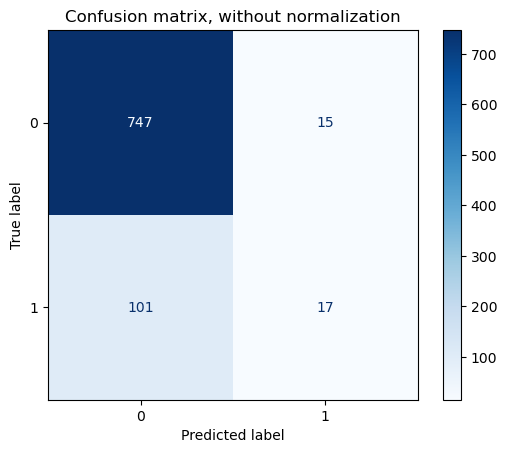

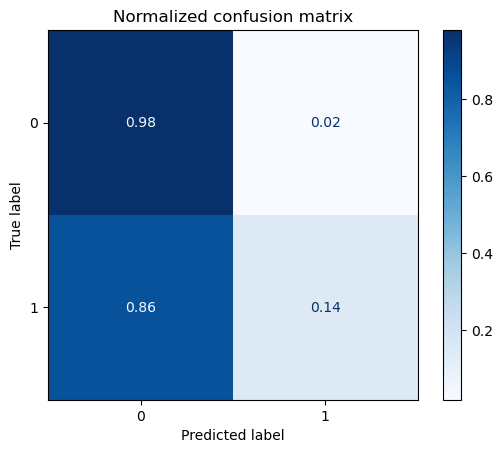

In [230]:
# Plot non-normalized confusion matrix
titles_options_redes = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options_redes:
    disp_redes = ConfusionMatrixDisplay.from_estimator(classifierRedesNeuronales, X_test_redes, y_test_redes,
                                                 #display_labels=y_test,
                                                 cmap=plt.cm.Blues,
                                                 normalize=normalize)
    disp_redes.ax_.set_title(title)

    print(title)
    print(disp_redes.confusion_matrix)

plt.show()
#sensibilidad 0.13
#especificidad 0.99

In [231]:
accuracy_redes = (754 + 15) / (754 + 15 + 8 + 103)
print(accuracy_redes)

0.8738636363636364


In [232]:
y_pred_prob_redes = classifierRedesNeuronales.predict_proba(X_test_redes)

In [233]:
y_pred_prob_redes[0:5]

array([[0.88951648, 0.11048352],
       [0.97057097, 0.02942903],
       [0.97350056, 0.02649944],
       [0.98623609, 0.01376391],
       [0.85588474, 0.14411526]])

In [234]:
y_pred_prob_redes[0:5,1]

array([0.11048352, 0.02942903, 0.02649944, 0.01376391, 0.14411526])

In [235]:
false_positive_rateRedesNeuronales, true_positive_rateRedesNeuronales, thresholdsRedesNeuronales = roc_curve(y_test_redes, y_pred_prob_redes[:,1])

In [236]:
roc_aucRedesNeuronales = auc(false_positive_rateRedesNeuronales, true_positive_rateRedesNeuronales)
roc_aucRedesNeuronales

0.7085613239023089

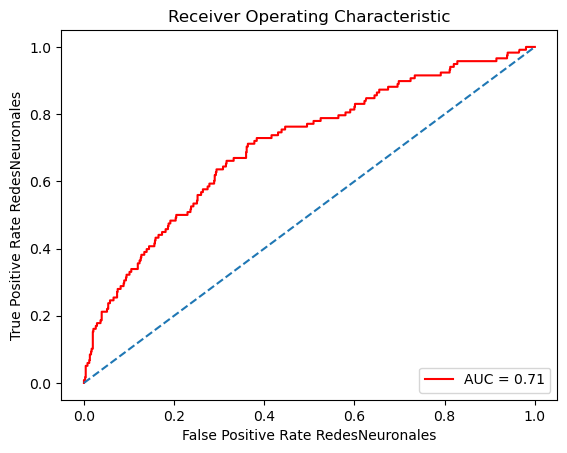

In [237]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rateRedesNeuronales,true_positive_rateRedesNeuronales, color='red',label = 'AUC = %0.2f' % roc_aucRedesNeuronales)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate RedesNeuronales')
plt.xlabel('False Positive Rate RedesNeuronales')
plt.show()

In [238]:
print(classification_report(y_test_redes, y_pred_redes))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       762
           1       0.53      0.14      0.23       118

    accuracy                           0.87       880
   macro avg       0.71      0.56      0.58       880
weighted avg       0.83      0.87      0.83       880



In [239]:
dataf_redes = pd.concat([pd.DataFrame(X_test_orig_redes),pd.DataFrame(y_test_redes),pd.DataFrame(y_pred_redes),pd.DataFrame(y_pred_prob_redes)],axis=1)

In [240]:
dataf_redes.columns = ['BMI','MentalHealth','SleepTime','PhysicalHealth','c_Smoking','c_AlcoholDrinking','c_Stroke','c_DiffWalking','c_PhysicalActivity','c_Asthma','c_KidneyDisease','c_SkinCancer','c_HeartDisease', 'c_HeartDisease_Pred', 'c_HeartDisease_Pred_Prob_0', 'c_HeartDisease_Pred_Prob_1']

In [241]:
dataf_redes.head()

,BMI,MentalHealth,SleepTime,PhysicalHealth,c_Smoking,c_AlcoholDrinking,c_Stroke,c_DiffWalking,c_PhysicalActivity,c_Asthma,c_KidneyDisease,c_SkinCancer,c_HeartDisease,c_HeartDisease_Pred,c_HeartDisease_Pred_Prob_0,c_HeartDisease_Pred_Prob_1
0,21.97,0.0,6.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.889516,0.110484
1,38.73,30.0,5.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.970571,0.029429
2,24.27,0.0,8.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0.973501,0.026499
3,40.00,0.0,8.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0,0,0.986236,0.013764
4,17.57,0.0,4.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.855885,0.144115


In [242]:
quantiles_redes = dataf_redes['c_HeartDisease_Pred_Prob_1'].quantile(q=[0.20,0.40,0.60,0.80])
quantiles_redes

0.2    0.027946
0.4    0.043270
0.6    0.072797
0.8    0.148746
Name: c_HeartDisease_Pred_Prob_1, dtype: float64

## 4.6. SVM

In [243]:
dataSVM = pd.read_csv('heart_2020_cleanedCorto.csv')

In [244]:
dataSVM['c_Smoking'] = LabelEncoder().fit_transform(dataSVM.Smoking.values)
dataSVM['c_AlcoholDrinking'] = LabelEncoder().fit_transform(dataSVM.AlcoholDrinking.values)
dataSVM['c_Stroke'] = LabelEncoder().fit_transform(dataSVM.Stroke.values)
dataSVM['c_DiffWalking'] = LabelEncoder().fit_transform(dataSVM.DiffWalking.values)
dataSVM['c_PhysicalActivity'] = LabelEncoder().fit_transform(dataSVM.PhysicalActivity.values)
dataSVM['c_Asthma'] = LabelEncoder().fit_transform(dataSVM.Asthma.values)
dataSVM['c_KidneyDisease'] = LabelEncoder().fit_transform(dataSVM.KidneyDisease.values)
dataSVM['c_SkinCancer'] = LabelEncoder().fit_transform(dataSVM.SkinCancer.values)
dataSVM['c_HeartDisease'] = LabelEncoder().fit_transform(dataSVM.HeartDisease.values)
dataSVM['c_HeartDisease'] = dataSVM['c_HeartDisease'].astype('int64')

In [245]:
dataSVM.c_HeartDisease.value_counts()

0    3920
1     479
Name: c_HeartDisease, dtype: int64

In [246]:
100*dataSVM['c_HeartDisease'].value_counts(normalize=True)

0    89.111162
1    10.888838
Name: c_HeartDisease, dtype: float64

In [247]:
X_SVM = dataSVM[['BMI','MentalHealth','SleepTime','PhysicalHealth','c_Smoking','c_AlcoholDrinking','c_Stroke','c_DiffWalking','c_PhysicalActivity','c_Asthma','c_KidneyDisease','c_SkinCancer']]
y_SVM = dataSVM['c_HeartDisease']

In [248]:
X_SVM = X_SVM.to_numpy()

In [249]:
X_SVM[0:5]

array([[16.6 , 30.  ,  5.  ,  3.  ,  1.  ,  0.  ,  0.  ,  0.  ,  1.  ,
         1.  ,  0.  ,  1.  ],
       [20.34,  0.  ,  7.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.  ,  1.  ,
         0.  ,  0.  ,  0.  ],
       [26.58, 30.  ,  8.  , 20.  ,  1.  ,  0.  ,  0.  ,  0.  ,  1.  ,
         1.  ,  0.  ,  0.  ],
       [24.21,  0.  ,  6.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  1.  ],
       [23.71,  0.  ,  8.  , 28.  ,  0.  ,  0.  ,  0.  ,  1.  ,  1.  ,
         0.  ,  0.  ,  0.  ]])

In [250]:
y_SVM = y_SVM.to_numpy()

In [251]:
y_SVM[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [252]:
X_train_SVM, X_test_SVM, y_train_SVM, y_test_SVM = train_test_split(X_SVM, y_SVM, test_size = 0.20, random_state = 0)

In [253]:
X_train_SVM[0:5]

array([[30.27,  0.  ,  6.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  ,
         0.  ,  0.  ,  1.  ],
       [34.97,  0.  ,  6.  , 25.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ],
       [23.62,  0.  ,  8.  ,  2.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  ,
         0.  ,  0.  ,  1.  ],
       [27.72, 30.  ,  3.  , 30.  ,  1.  ,  0.  ,  0.  ,  0.  ,  1.  ,
         1.  ,  0.  ,  1.  ],
       [25.06, 30.  ,  8.  , 20.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  ,
         0.  ,  0.  ,  0.  ]])

In [254]:
X_test_SVM[0:5]

array([[21.97,  0.  ,  6.  ,  0.  ,  1.  ,  1.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ],
       [38.73, 30.  ,  5.  ,  2.  ,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ],
       [24.27,  0.  ,  8.  ,  0.  ,  0.  ,  1.  ,  0.  ,  0.  ,  1.  ,
         0.  ,  0.  ,  0.  ],
       [40.  ,  0.  ,  8.  ,  0.  ,  1.  ,  1.  ,  0.  ,  0.  ,  1.  ,
         1.  ,  0.  ,  0.  ],
       [17.57,  0.  ,  4.  , 20.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ]])

In [255]:
X_train_SVM = StandardScaler().fit_transform(X_train_SVM)
X_test_SVM = StandardScaler().fit_transform(X_test_SVM)

In [256]:
X_train_SVM[0:5]

array([[ 0.13099123, -0.52778061, -0.64260159, -0.48575432, -0.86595363,
        -0.22250372, -0.24806947, -0.50230784,  0.63226682, -0.40506224,
        -0.22179944,  2.53766552],
       [ 0.83543974, -0.52778061, -0.64260159,  2.40677553, -0.86595363,
        -0.22250372, -0.24806947, -0.50230784, -1.58161074, -0.40506224,
        -0.22179944, -0.39406297],
       [-0.86572848, -0.52778061,  0.59073083, -0.25435193, -0.86595363,
        -0.22250372, -0.24806947, -0.50230784,  0.63226682, -0.40506224,
        -0.22179944,  2.53766552],
       [-0.25120956,  2.89721318, -2.49260023,  2.9852815 ,  1.15479625,
        -0.22250372, -0.24806947, -0.50230784,  0.63226682,  2.46875638,
        -0.22179944,  2.53766552],
       [-0.64989744,  2.89721318,  0.59073083,  1.82826956, -0.86595363,
        -0.22250372, -0.24806947, -0.50230784,  0.63226682, -0.40506224,
        -0.22179944, -0.39406297]])

In [257]:
X_test_SVM[0:5]

array([[-1.07727666, -0.47569752, -0.69677502, -0.46607149,  1.13651514,
         4.84194635, -0.23485288, -0.46779971, -1.5742493 , -0.43125842,
        -0.22387347, -0.34168885],
       [ 1.39905081,  3.32297594, -1.35965287, -0.23049256,  1.13651514,
        -0.20652852, -0.23485288, -0.46779971, -1.5742493 , -0.43125842,
        -0.22387347, -0.34168885],
       [-0.73744652, -0.47569752,  0.62898069, -0.46607149, -0.87988269,
         4.84194635, -0.23485288, -0.46779971,  0.6352234 , -0.43125842,
        -0.22387347, -0.34168885],
       [ 1.58669615, -0.47569752,  0.62898069, -0.46607149,  1.13651514,
         4.84194635, -0.23485288, -0.46779971,  0.6352234 ,  2.31879529,
        -0.22387347, -0.34168885],
       [-1.7273865 , -0.47569752, -2.02253073,  1.88971779, -0.87988269,
        -0.20652852, -0.23485288, -0.46779971, -1.5742493 , -0.43125842,
        -0.22387347, -0.34168885]])

In [258]:
#Modelado
#Validación Cruzada
cv_scores_SVM = cross_val_score(SVC(kernel='linear',probability=True),X_train_SVM,y_train_SVM,cv=5)

In [259]:
#Accuracy
print(cv_scores_SVM)

[0.89772727 0.89772727 0.89772727 0.89630682 0.89758179]


In [260]:
#Accuracy Promedio
print("cv_scores mean:{}".format(np.mean(cv_scores_SVM)))

cv_scores mean:0.8974140857364542


In [261]:
#Tuning
#param_grid = {'C': [0.1,1,10,100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
param_grid_SVM = {'C': [0.1,1,5,10,50,100], 
              'gamma': [2,1.5,1,0.1,0.01,0.001],
              'kernel': ['rbf']}

In [262]:
grid_SVM = GridSearchCV(SVC(),param_grid_SVM,refit=True,verbose=2,cv=5)
grid_SVM.fit(X_train_SVM,y_train_SVM)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END .........................C=0.1, gamma=2, kernel=rbf; total time=   0.2s


[CV] END .........................C=0.1, gamma=2, kernel=rbf; total time=   0.2s
[CV] END .........................C=0.1, gamma=2, kernel=rbf; total time=   0.2s
[CV] END .........................C=0.1, gamma=2, kernel=rbf; total time=   0.2s
[CV] END .........................C=0.1, gamma=2, kernel=rbf; total time=   0.2s
[CV] END .......................C=0.1, gamma=1.5, kernel=rbf; total time=   0.1s
[CV] END .......................C=0.1, gamma=1.5, kernel=rbf; total time=   0.2s
[CV] END .......................C=0.1, gamma=1.5, kernel=rbf; total time=   0.1s
[CV] END .......................C=0.1, gamma=1.5, kernel=rbf; total time=   0.1s
[CV] END .......................C=0.1, gamma=1.5, kernel=rbf; total time=   0.2s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...................

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 5, 10, 50, 100],
                         'gamma': [2, 1.5, 1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             verbose=2)

In [263]:
print(grid_SVM.best_estimator_)

SVC(C=0.1, gamma=2)


In [264]:
#SVM
classifierSVM = SVC(kernel='rbf',C = 10,gamma = 2,probability=True).fit(X_train_SVM, y_train_SVM)

In [265]:
#Evaluación
y_pred_SVM = classifierSVM.predict(X_test_SVM)

In [266]:
y_pred_SVM[0:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [267]:
y_test_SVM[0:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
      dtype=int64)

In [268]:
confusion_matrix(y_test_SVM, y_pred_SVM)

array([[750,  12],
       [114,   4]], dtype=int64)

Confusion matrix, without normalization
[[750  12]
 [114   4]]
Normalized confusion matrix
[[0.98425197 0.01574803]
 [0.96610169 0.03389831]]


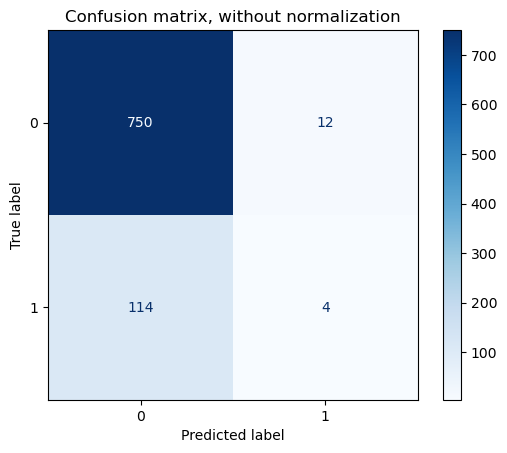

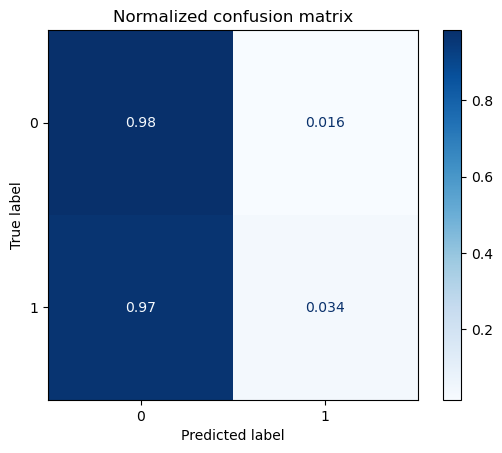

In [269]:
# Plot non-normalized confusion matrix
titles_options_SVM = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options_SVM:
#ConfusionMatrixDisplay
    disp_SVM = ConfusionMatrixDisplay.from_estimator(classifierSVM, X_test_SVM, y_test_SVM,
                                                 #display_labels=y_test,
                                                 cmap=plt.cm.Blues,
                                                 normalize=normalize)
    disp_SVM.ax_.set_title(title)

    print(title)
    print(disp_SVM.confusion_matrix)

plt.show()
#sensibilidad 0.034
#especificidad 0.98

In [270]:
accuracy_SVM = (750 + 4) / (114 + 12 + 750 + 4)
print(accuracy_SVM)

0.8568181818181818


In [271]:
y_pred_prob_SVM = classifierSVM.predict_proba(X_test_SVM)

In [272]:
y_pred_prob_SVM[0:5]

array([[0.90292703, 0.09707297],
       [0.88710703, 0.11289297],
       [0.90276138, 0.09723862],
       [0.88245572, 0.11754428],
       [0.88229796, 0.11770204]])

In [273]:
y_pred_prob_SVM[0:5,1]

array([0.09707297, 0.11289297, 0.09723862, 0.11754428, 0.11770204])

In [274]:
false_positive_rateSVM, true_positive_rateSVM, thresholdsSVM = roc_curve(y_test_SVM, y_pred_prob_SVM[:,1])

In [275]:
roc_aucSVM = auc(false_positive_rateSVM, true_positive_rateSVM)
roc_aucSVM

0.6936585257351306

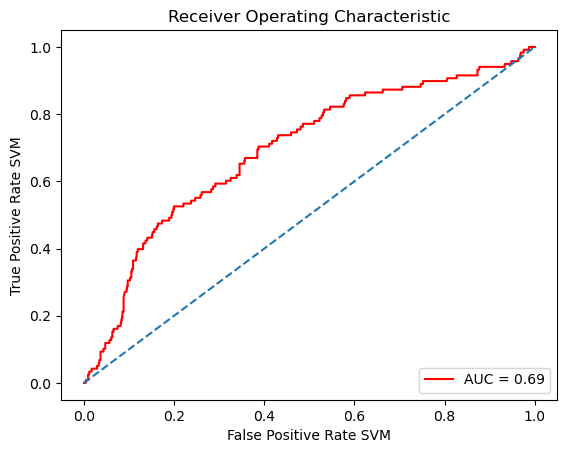

In [276]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rateSVM,true_positive_rateSVM, color='red',label = 'AUC = %0.2f' % roc_aucSVM)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate SVM')
plt.xlabel('False Positive Rate SVM')
plt.show()

In [277]:
print(classification_report(y_test_SVM, y_pred_SVM))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       762
           1       0.25      0.03      0.06       118

    accuracy                           0.86       880
   macro avg       0.56      0.51      0.49       880
weighted avg       0.79      0.86      0.81       880



In [278]:
dataf_SVM = pd.concat([pd.DataFrame(X_test_SVM),pd.DataFrame(y_test_SVM),pd.DataFrame(y_pred_SVM),pd.DataFrame(y_pred_prob_SVM)],axis=1)

In [279]:
dataf_SVM.columns = ['BMI','MentalHealth','SleepTime','PhysicalHealth','c_Smoking','c_AlcoholDrinking','c_Stroke','c_DiffWalking','c_PhysicalActivity','c_Asthma','c_KidneyDisease','c_SkinCancer','c_HeartDisease', 'c_HeartDisease_Pred', 'c_HeartDisease_Pred_Prob_0', 'c_HeartDisease_Pred_Prob_1']

In [280]:
dataf_SVM.head()

,BMI,MentalHealth,SleepTime,PhysicalHealth,c_Smoking,c_AlcoholDrinking,c_Stroke,c_DiffWalking,c_PhysicalActivity,c_Asthma,c_KidneyDisease,c_SkinCancer,c_HeartDisease,c_HeartDisease_Pred,c_HeartDisease_Pred_Prob_0,c_HeartDisease_Pred_Prob_1
0,-1.077277,-0.475698,-0.696775,-0.466071,1.136515,4.841946,-0.234853,-0.4678,-1.574249,-0.431258,-0.223873,-0.341689,0,0,0.902927,0.097073
1,1.399051,3.322976,-1.359653,-0.230493,1.136515,-0.206529,-0.234853,-0.4678,-1.574249,-0.431258,-0.223873,-0.341689,0,0,0.887107,0.112893
2,-0.737447,-0.475698,0.628981,-0.466071,-0.879883,4.841946,-0.234853,-0.4678,0.635223,-0.431258,-0.223873,-0.341689,0,0,0.902761,0.097239
3,1.586696,-0.475698,0.628981,-0.466071,1.136515,4.841946,-0.234853,-0.4678,0.635223,2.318795,-0.223873,-0.341689,0,0,0.882456,0.117544
4,-1.727386,-0.475698,-2.022531,1.889718,-0.879883,-0.206529,-0.234853,-0.4678,-1.574249,-0.431258,-0.223873,-0.341689,0,0,0.882298,0.117702


In [281]:
quantiles_SVM = dataf_SVM['c_HeartDisease_Pred_Prob_1'].quantile(q=[0.20,0.40,0.60,0.80])
quantiles_SVM

0.2    0.080457
0.4    0.089471
0.6    0.098762
0.8    0.116529
Name: c_HeartDisease_Pred_Prob_1, dtype: float64

## 4.7. Random Forest

In [282]:
data_randomforest = pd.read_csv('heart_2020_cleanedCorto.csv')

In [283]:
#Prep
data_randomforest['c_Smoking'] = LabelEncoder().fit_transform(data_randomforest.Smoking.values)
data_randomforest['c_AlcoholDrinking'] = LabelEncoder().fit_transform(data_randomforest.AlcoholDrinking.values)
data_randomforest['c_Stroke'] = LabelEncoder().fit_transform(data_randomforest.Stroke.values)
data_randomforest['c_DiffWalking'] = LabelEncoder().fit_transform(data_randomforest.DiffWalking.values)
data_randomforest['c_PhysicalActivity'] = LabelEncoder().fit_transform(data_randomforest.PhysicalActivity.values)
data_randomforest['c_Asthma'] = LabelEncoder().fit_transform(data_randomforest.Asthma.values)
data_randomforest['c_KidneyDisease'] = LabelEncoder().fit_transform(data_randomforest.KidneyDisease.values)
data_randomforest['c_SkinCancer'] = LabelEncoder().fit_transform(data_randomforest.SkinCancer.values)
data_randomforest['c_HeartDisease'] = LabelEncoder().fit_transform(data_randomforest.HeartDisease.values)
data_randomforest['c_HeartDisease'] = data_randomforest['c_HeartDisease'].astype('int64')

In [284]:
data_randomforest = data_randomforest.drop(['HeartDisease','Smoking', 'AlcoholDrinking','Stroke','DiffWalking','PhysicalActivity','Asthma','KidneyDisease','SkinCancer'], axis=1)

In [285]:
data_randomforest.c_HeartDisease.value_counts()

0    3920
1     479
Name: c_HeartDisease, dtype: int64

In [286]:
100*data_randomforest['c_HeartDisease'].value_counts(normalize=True)

0    89.111162
1    10.888838
Name: c_HeartDisease, dtype: float64

In [287]:
X_randomforest = data_randomforest[['BMI','MentalHealth','SleepTime','PhysicalHealth','c_Smoking','c_AlcoholDrinking','c_Stroke','c_DiffWalking','c_PhysicalActivity','c_Asthma','c_KidneyDisease','c_SkinCancer']]
y_randomforest = data_randomforest['c_HeartDisease']

In [288]:
X_randomforest = X_randomforest.to_numpy()

In [289]:
X_randomforest[0:5]

array([[16.6 , 30.  ,  5.  ,  3.  ,  1.  ,  0.  ,  0.  ,  0.  ,  1.  ,
         1.  ,  0.  ,  1.  ],
       [20.34,  0.  ,  7.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.  ,  1.  ,
         0.  ,  0.  ,  0.  ],
       [26.58, 30.  ,  8.  , 20.  ,  1.  ,  0.  ,  0.  ,  0.  ,  1.  ,
         1.  ,  0.  ,  0.  ],
       [24.21,  0.  ,  6.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  1.  ],
       [23.71,  0.  ,  8.  , 28.  ,  0.  ,  0.  ,  0.  ,  1.  ,  1.  ,
         0.  ,  0.  ,  0.  ]])

In [290]:
y_randomforest = y_randomforest.to_numpy()

In [291]:
y_randomforest[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [292]:
X_train_randomforest, X_test_randomforest, y_train_randomforest, y_test_randomforest = train_test_split(X_randomforest, y_randomforest, test_size = 0.20, random_state = 0)

In [293]:
X_train_randomforest[0:5]

array([[30.27,  0.  ,  6.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  ,
         0.  ,  0.  ,  1.  ],
       [34.97,  0.  ,  6.  , 25.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ],
       [23.62,  0.  ,  8.  ,  2.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  ,
         0.  ,  0.  ,  1.  ],
       [27.72, 30.  ,  3.  , 30.  ,  1.  ,  0.  ,  0.  ,  0.  ,  1.  ,
         1.  ,  0.  ,  1.  ],
       [25.06, 30.  ,  8.  , 20.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  ,
         0.  ,  0.  ,  0.  ]])

In [294]:
X_test_randomforest[0:5]

array([[21.97,  0.  ,  6.  ,  0.  ,  1.  ,  1.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ],
       [38.73, 30.  ,  5.  ,  2.  ,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ],
       [24.27,  0.  ,  8.  ,  0.  ,  0.  ,  1.  ,  0.  ,  0.  ,  1.  ,
         0.  ,  0.  ,  0.  ],
       [40.  ,  0.  ,  8.  ,  0.  ,  1.  ,  1.  ,  0.  ,  0.  ,  1.  ,
         1.  ,  0.  ,  0.  ],
       [17.57,  0.  ,  4.  , 20.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ]])

In [295]:
X_train_orig_randomforest = X_train_randomforest
X_test_orig_randomforest = X_test_randomforest

In [296]:
X_train_randomforest = StandardScaler().fit_transform(X_train_randomforest)
X_test_randomforest = StandardScaler().fit_transform(X_test_randomforest)

In [297]:
X_train_randomforest[0:5]

array([[ 0.13099123, -0.52778061, -0.64260159, -0.48575432, -0.86595363,
        -0.22250372, -0.24806947, -0.50230784,  0.63226682, -0.40506224,
        -0.22179944,  2.53766552],
       [ 0.83543974, -0.52778061, -0.64260159,  2.40677553, -0.86595363,
        -0.22250372, -0.24806947, -0.50230784, -1.58161074, -0.40506224,
        -0.22179944, -0.39406297],
       [-0.86572848, -0.52778061,  0.59073083, -0.25435193, -0.86595363,
        -0.22250372, -0.24806947, -0.50230784,  0.63226682, -0.40506224,
        -0.22179944,  2.53766552],
       [-0.25120956,  2.89721318, -2.49260023,  2.9852815 ,  1.15479625,
        -0.22250372, -0.24806947, -0.50230784,  0.63226682,  2.46875638,
        -0.22179944,  2.53766552],
       [-0.64989744,  2.89721318,  0.59073083,  1.82826956, -0.86595363,
        -0.22250372, -0.24806947, -0.50230784,  0.63226682, -0.40506224,
        -0.22179944, -0.39406297]])

In [298]:
X_test_randomforest[0:5]

array([[-1.07727666, -0.47569752, -0.69677502, -0.46607149,  1.13651514,
         4.84194635, -0.23485288, -0.46779971, -1.5742493 , -0.43125842,
        -0.22387347, -0.34168885],
       [ 1.39905081,  3.32297594, -1.35965287, -0.23049256,  1.13651514,
        -0.20652852, -0.23485288, -0.46779971, -1.5742493 , -0.43125842,
        -0.22387347, -0.34168885],
       [-0.73744652, -0.47569752,  0.62898069, -0.46607149, -0.87988269,
         4.84194635, -0.23485288, -0.46779971,  0.6352234 , -0.43125842,
        -0.22387347, -0.34168885],
       [ 1.58669615, -0.47569752,  0.62898069, -0.46607149,  1.13651514,
         4.84194635, -0.23485288, -0.46779971,  0.6352234 ,  2.31879529,
        -0.22387347, -0.34168885],
       [-1.7273865 , -0.47569752, -2.02253073,  1.88971779, -0.87988269,
        -0.20652852, -0.23485288, -0.46779971, -1.5742493 , -0.43125842,
        -0.22387347, -0.34168885]])

In [299]:
#Modelado
#Validación Cruzada
cv_scores_randomforest = cross_val_score(RandomForestClassifier(),X_train_randomforest,y_train_randomforest,cv=5)

In [300]:
#Accuracy
print(cv_scores_randomforest)

[0.88778409 0.86505682 0.87784091 0.875      0.87482219]


In [301]:
#Accuracy Promedio
print("cv_scores mean:{}".format(np.mean(cv_scores_randomforest)))

cv_scores mean:0.8761008017586965


In [302]:
#Tuning
#n_estimators: Número de árboles
#max_features: Cantidad de variables a considerar al buscar el mejor split
#max_depth: Profundidad del árbol

param_grid_randomforest = {
    'n_estimators': [100, 200, 300, 400, 500, 600, 700],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]
}

In [303]:
grid_randomforest = GridSearchCV(RandomForestClassifier(),param_grid_randomforest,refit=True,verbose=2,cv=5)
grid_randomforest.fit(X_train_randomforest,y_train_randomforest)
#por 126 ajustes con 5 validaciones cruzadas entonces se ajusta 630 modelos. 

Fitting 5 folds for each of 126 candidates, totalling 630 fits
[CV] END ...max_depth=2, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END ...max_depth=2, max_features=sqrt, n_estimators=100; total time=   0.1s


[CV] END ...max_depth=2, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END ...max_depth=2, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END ...max_depth=2, max_features=sqrt, n_estimators=100; total time=   0.0s
[CV] END ...max_depth=2, max_features=sqrt, n_estimators=200; total time=   0.2s
[CV] END ...max_depth=2, max_features=sqrt, n_estimators=200; total time=   0.2s
[CV] END ...max_depth=2, max_features=sqrt, n_estimators=200; total time=   0.2s
[CV] END ...max_depth=2, max_features=sqrt, n_estimators=200; total time=   0.2s
[CV] END ...max_depth=2, max_features=sqrt, n_estimators=200; total time=   0.2s
[CV] END ...max_depth=2, max_features=sqrt, n_estimators=300; total time=   0.3s
[CV] END ...max_depth=2, max_features=sqrt, n_estimators=300; total time=   0.3s
[CV] END ...max_depth=2, max_features=sqrt, n_estimators=300; total time=   0.3s
[CV] END ...max_depth=2, max_features=sqrt, n_estimators=300; total time=   0.3s
[CV] END ...max_depth=2, max

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [100, 200, 300, 400, 500, 600, 700]},
             verbose=2)

In [304]:
print(grid_randomforest.best_estimator_)

RandomForestClassifier(max_depth=5, n_estimators=200)


In [305]:
#Random Forest
classifierRandomForest = RandomForestClassifier(max_depth=4, max_features='log2', n_estimators=600).fit(X_train_randomforest, y_train_randomforest)

In [306]:
feature_scores_randomforest = pd.Series(classifierRandomForest.feature_importances_, index=['BMI','MentalHealth','SleepTime','PhysicalHealth','c_Smoking','c_AlcoholDrinking','c_Stroke','c_DiffWalking','c_PhysicalActivity','c_Asthma','c_KidneyDisease','c_SkinCancer']).sort_values(ascending=False)
feature_scores_randomforest

c_Stroke              0.215753
c_DiffWalking         0.184642
PhysicalHealth        0.173940
BMI                   0.098718
c_KidneyDisease       0.085638
c_Smoking             0.062228
SleepTime             0.055300
MentalHealth          0.042239
c_SkinCancer          0.040738
c_PhysicalActivity    0.024298
c_Asthma              0.011536
c_AlcoholDrinking     0.004970
dtype: float64

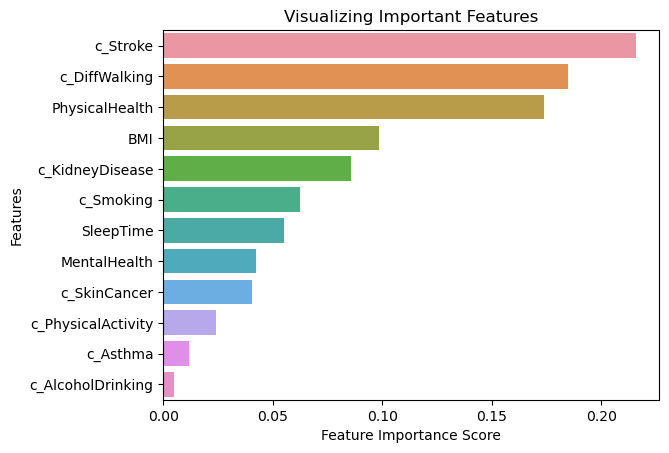

In [307]:
sns.barplot(x=feature_scores_randomforest, y=feature_scores_randomforest.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()
#Se evaluó que el feature más importante es C_Strokes porque tiene el mayor peso en el modelo.

In [308]:
#Evaluación
y_pred_randomforest = classifierRandomForest.predict(X_test_randomforest)

In [309]:
y_pred_randomforest[0:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [310]:
y_test_randomforest[0:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
      dtype=int64)

In [311]:
confusion_matrix(y_test_randomforest, y_pred_randomforest)

array([[762,   0],
       [118,   0]], dtype=int64)

Confusion matrix, without normalization
[[762   0]
 [118   0]]
Normalized confusion matrix
[[1. 0.]
 [1. 0.]]


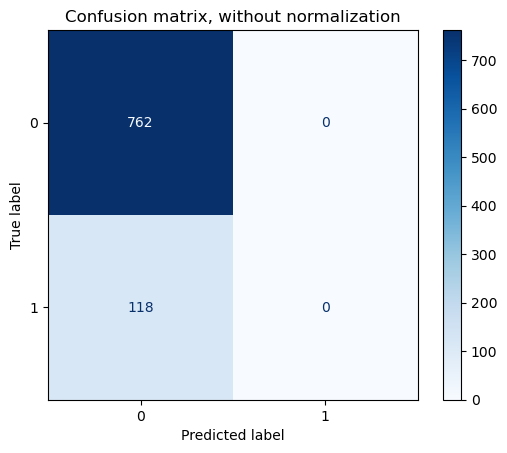

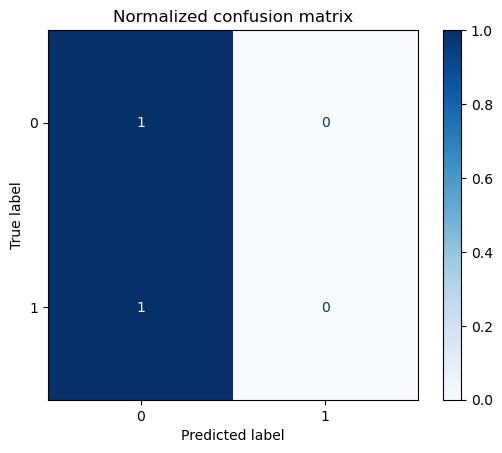

In [312]:
# Plot non-normalized confusion matrix
titles_options_randomforest = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options_randomforest:
    disp_randomforest = ConfusionMatrixDisplay.from_estimator(classifierRandomForest, X_test_randomforest, y_test_randomforest,
                                                 #display_labels=y_test,
                                                 cmap=plt.cm.Blues,
                                                 normalize=normalize)
    disp_randomforest.ax_.set_title(title)

    print(title)
    print(disp_randomforest.confusion_matrix)

plt.show()
#sensibilidad 0
#especificidad 1

In [313]:
accuracy_randomforest = (762 + 0) / (0 + 118 + 762 + 0)
print(accuracy_randomforest)

0.865909090909091


In [314]:
y_pred_prob_randomforest = classifierRandomForest.predict_proba(X_test_randomforest)

In [315]:
y_pred_prob_randomforest[0:5]

array([[0.9263511 , 0.0736489 ],
       [0.92401442, 0.07598558],
       [0.94564347, 0.05435653],
       [0.91918685, 0.08081315],
       [0.83267232, 0.16732768]])

In [316]:
y_pred_prob_randomforest[0:5,1]

array([0.0736489 , 0.07598558, 0.05435653, 0.08081315, 0.16732768])

In [317]:
false_positive_rateRandomForest, true_positive_rateRandomForest, thresholdsRandomForest = roc_curve(y_test_randomforest, y_pred_prob_randomforest[:,1])

In [318]:
roc_aucRandomForest = auc(false_positive_rateRandomForest, true_positive_rateRandomForest)
roc_aucRandomForest

0.7794663908536856

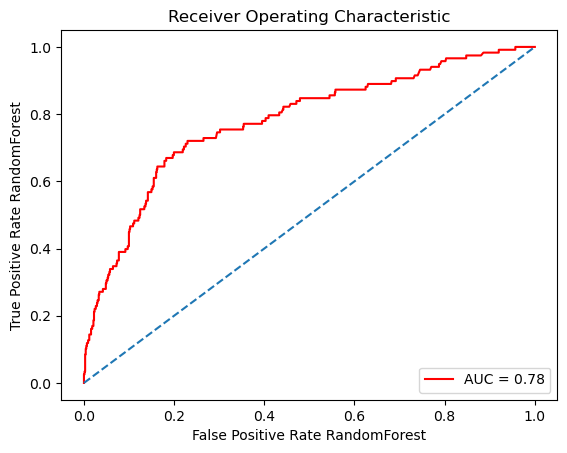

In [319]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rateRandomForest,true_positive_rateRandomForest, color='red',label = 'AUC = %0.2f' % roc_aucRandomForest)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate RandomForest')
plt.xlabel('False Positive Rate RandomForest')
plt.show()

In [320]:
print(classification_report(y_test_randomforest, y_pred_randomforest))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       762
           1       0.00      0.00      0.00       118

    accuracy                           0.87       880
   macro avg       0.43      0.50      0.46       880
weighted avg       0.75      0.87      0.80       880



c:\Users\steph\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\steph\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\steph\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [321]:
dataf_randomforest = pd.concat([pd.DataFrame(X_test_randomforest),pd.DataFrame(y_test_randomforest),pd.DataFrame(y_pred_randomforest),pd.DataFrame(y_pred_prob_randomforest)],axis=1)

In [322]:
dataf_randomforest.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,0,0,0,1
0,-1.077277,-0.475698,-0.696775,-0.466071,1.136515,4.841946,-0.234853,-0.4678,-1.574249,-0.431258,-0.223873,-0.341689,0,0,0.926351,0.073649
1,1.399051,3.322976,-1.359653,-0.230493,1.136515,-0.206529,-0.234853,-0.4678,-1.574249,-0.431258,-0.223873,-0.341689,0,0,0.924014,0.075986
2,-0.737447,-0.475698,0.628981,-0.466071,-0.879883,4.841946,-0.234853,-0.4678,0.635223,-0.431258,-0.223873,-0.341689,0,0,0.945643,0.054357
3,1.586696,-0.475698,0.628981,-0.466071,1.136515,4.841946,-0.234853,-0.4678,0.635223,2.318795,-0.223873,-0.341689,0,0,0.919187,0.080813
4,-1.727386,-0.475698,-2.022531,1.889718,-0.879883,-0.206529,-0.234853,-0.4678,-1.574249,-0.431258,-0.223873,-0.341689,0,0,0.832672,0.167328


In [323]:
dataf_randomforest.columns = ['BMI','MentalHealth','SleepTime','PhysicalHealth','c_Smoking','c_AlcoholDrinking','c_Stroke','c_DiffWalking','c_PhysicalActivity','c_Asthma','c_KidneyDisease','c_SkinCancer','c_HeartDisease', 'c_HeartDisease_Pred', 'c_HeartDisease_Pred_Prob_0', 'c_HeartDisease_Pred_Prob_1']

In [324]:
dataf_randomforest.head(10)

,BMI,MentalHealth,SleepTime,PhysicalHealth,c_Smoking,c_AlcoholDrinking,c_Stroke,c_DiffWalking,c_PhysicalActivity,c_Asthma,c_KidneyDisease,c_SkinCancer,c_HeartDisease,c_HeartDisease_Pred,c_HeartDisease_Pred_Prob_0,c_HeartDisease_Pred_Prob_1
0,-1.077277,-0.475698,-0.696775,-0.466071,1.136515,4.841946,-0.234853,-0.467800,-1.574249,-0.431258,-0.223873,-0.341689,0,0,0.926351,0.073649
1,1.399051,3.322976,-1.359653,-0.230493,1.136515,-0.206529,-0.234853,-0.467800,-1.574249,-0.431258,-0.223873,-0.341689,0,0,0.924014,0.075986
2,-0.737447,-0.475698,0.628981,-0.466071,-0.879883,4.841946,-0.234853,-0.467800,0.635223,-0.431258,-0.223873,-0.341689,0,0,0.945643,0.054357
3,1.586696,-0.475698,0.628981,-0.466071,1.136515,4.841946,-0.234853,-0.467800,0.635223,2.318795,-0.223873,-0.341689,0,0,0.919187,0.080813
4,-1.727386,-0.475698,-2.022531,1.889718,-0.879883,-0.206529,-0.234853,-0.467800,-1.574249,-0.431258,-0.223873,-0.341689,0,0,0.832672,0.167328
5,0.843502,-0.222453,-0.696775,0.122876,1.136515,-0.206529,4.257985,2.137667,0.635223,2.318795,-0.223873,-0.341689,0,0,0.743595,0.256405
6,0.536178,-0.475698,-2.022531,-0.466071,1.136515,-0.206529,-0.234853,-0.467800,0.635223,-0.431258,-0.223873,-0.341689,0,0,0.914623,0.085377
7,1.563056,-0.475698,-0.696775,-0.466071,-0.879883,-0.206529,-0.234853,-0.467800,0.635223,-0.431258,-0.223873,-0.341689,0,0,0.944026,0.055974
8,0.004270,-0.475698,0.628981,-0.466071,1.136515,-0.206529,-0.234853,-0.467800,0.635223,-0.431258,-0.223873,-0.341689,0,0,0.917164,0.082836
9,1.044445,-0.475698,0.628981,-0.466071,-0.879883,-0.206529,-0.234853,-0.467800,0.635223,-0.431258,4.466809,-0.341689,0,0,0.909998,0.090002


In [325]:
dataf_randomforest = pd.concat([pd.DataFrame(X_test_orig_randomforest),pd.DataFrame(y_test_randomforest),pd.DataFrame(y_pred_randomforest),pd.DataFrame(y_pred_prob_randomforest)],axis=1)

In [326]:
dataf_randomforest.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,0,0,0,1
0,21.97,0.0,6.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.926351,0.073649
1,38.73,30.0,5.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.924014,0.075986
2,24.27,0.0,8.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0.945643,0.054357
3,40.00,0.0,8.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0,0,0.919187,0.080813
4,17.57,0.0,4.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.832672,0.167328
5,34.97,2.0,6.0,5.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0,0,0.743595,0.256405
6,32.89,0.0,4.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0.914623,0.085377
7,39.84,0.0,6.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0.944026,0.055974
8,29.29,0.0,8.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0.917164,0.082836
9,36.33,0.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0,0,0.909998,0.090002


In [327]:
dataf_randomforest.columns = ['BMI','MentalHealth','SleepTime','PhysicalHealth','c_Smoking','c_AlcoholDrinking','c_Stroke','c_DiffWalking','c_PhysicalActivity','c_Asthma','c_KidneyDisease','c_SkinCancer','c_HeartDisease', 'c_HeartDisease_Pred', 'c_HeartDisease_Pred_Prob_0', 'c_HeartDisease_Pred_Prob_1']

In [328]:
dataf_randomforest.head(10)

,BMI,MentalHealth,SleepTime,PhysicalHealth,c_Smoking,c_AlcoholDrinking,c_Stroke,c_DiffWalking,c_PhysicalActivity,c_Asthma,c_KidneyDisease,c_SkinCancer,c_HeartDisease,c_HeartDisease_Pred,c_HeartDisease_Pred_Prob_0,c_HeartDisease_Pred_Prob_1
0,21.97,0.0,6.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.926351,0.073649
1,38.73,30.0,5.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.924014,0.075986
2,24.27,0.0,8.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0.945643,0.054357
3,40.00,0.0,8.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0,0,0.919187,0.080813
4,17.57,0.0,4.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.832672,0.167328
5,34.97,2.0,6.0,5.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0,0,0.743595,0.256405
6,32.89,0.0,4.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0.914623,0.085377
7,39.84,0.0,6.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0.944026,0.055974
8,29.29,0.0,8.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0.917164,0.082836
9,36.33,0.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0,0,0.909998,0.090002


In [329]:
quantiles_randomforest = dataf_randomforest['c_HeartDisease_Pred_Prob_1'].quantile(q=[0.20,0.40,0.60,0.80])
quantiles_randomforest

0.2    0.054732
0.4    0.067600
0.6    0.082164
0.8    0.134130
Name: c_HeartDisease_Pred_Prob_1, dtype: float64

In [330]:
#dataf_randomforest.to_csv('dataf_randomforest.csv', index = False)

# Gráfico de modelos

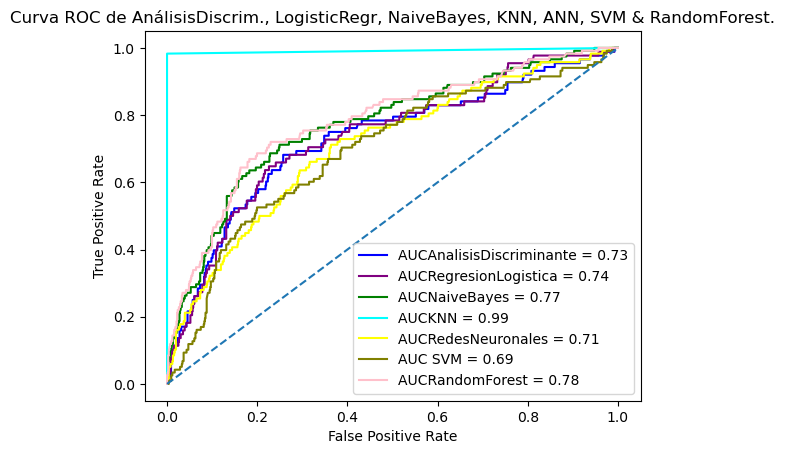

In [331]:
plt.title('Curva ROC de AnálisisDiscrim., LogisticRegr, NaiveBayes, KNN, ANN, SVM & RandomForest.')
plt.plot(false_positive_rateAnalisisDiscriminante,true_positive_rateAnalisisDiscriminante, color='blue',label = 'AUCAnalisisDiscriminante = %0.2f' % roc_aucAnalisisDiscriminante)
plt.plot(false_positive_rateRegresionLogistica,true_positive_rateRegresionLogistica, color='purple',label = 'AUCRegresionLogistica = %0.2f' % roc_aucRegresionLogistica)
plt.plot(false_positive_rateNaiveBayes,true_positive_rateNaiveBayes, color='green',label = 'AUCNaiveBayes = %0.2f' % roc_aucNaiveBayes)
plt.plot(false_positive_rateKNN,true_positive_rateKNN, color='cyan',label = 'AUCKNN = %0.2f' % roc_aucKNN)
plt.plot(false_positive_rateRedesNeuronales,true_positive_rateRedesNeuronales, color='yellow',label = 'AUCRedesNeuronales = %0.2f' % roc_aucRedesNeuronales)
plt.plot(false_positive_rateSVM,true_positive_rateSVM, color='olive',label = 'AUC SVM = %0.2f' % roc_aucSVM)
plt.plot(false_positive_rateRandomForest,true_positive_rateRandomForest, color='pink',label = 'AUCRandomForest = %0.2f' % roc_aucRandomForest)

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
#modelo KNN tiene un excelente rendimiento para clasificar entre
# las dos clases. Esto implica que el modelo KNN 
# es capaz de discriminar entre los casos positivos 
# y negativos con un 93% de precisión.
# Esto es mucho mejor que los otros 6 algoritmos
# que tienen valores de AUC desde 0.71 a menos.